# BAX 423 Homework 5

## Problem 1

### Question 1

Show that the softmax function is invariant to constant offsets to its input, i.e., sof tmax(a + c1) = sof tmax(a), where c ∈ R is some constant and ​1 ​denotes a
column vector of 1s.



The softmax function is invariant to constant offsets as when you take the derivative of the softmax function the constants don't effect the result.

$ 𝜎(𝐱+𝑐)_𝑗=\frac{𝑒^{𝑧_𝑗+𝑐}}{∑_{k=1}^{K}e^{z_k+c}}=\frac{e^ce^{z_j}}{e^c∑_{k=1}^{K}e^{z_k}}=\frac{e^{z_j}}{∑_{k=1}^{K}e^{z_k}}=σ(𝐱)_j $

This proof shows that the softmax function is invariant to constant offsets.

### Question 2

In practice, why is the observation that the softmax function is invariant to
constant offsets to its input important when implementing it in a neural network?


This is important because in a neural network there is often going to be random noise thrown into the data and removing this noise or at least being invariant to the noise will help stabilize the predictive power of the models. The softmax function also prevents issues of the variables going to 0 and causing null values. This also accounts for any possible biases which have been introduced into the model as the model is being trained and will improve the final prediction capabilities of the model.

## Problem 2

Import the necessary packages

In [2]:
import sys
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD

### Question 1

Warm-up: Load the dataset and check how the images look like

170498071/170498071 [==============================] - 1313s 8us/step


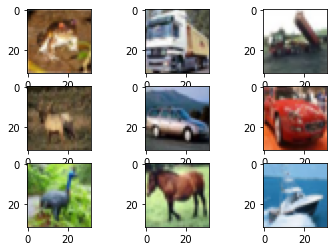

In [4]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

trainX, trainY, testX, testY = load_dataset()

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i])
 
# show the figure
plt.show()

### Question 2

Train a CNN with three hidden convolutional layers that use the ReLU activation
function. Use 64 11×11 filters for the first layer, followed by 2×2 max pooling (stride of 2). The next two convolutional layers will use 128 3×3 filters followed by the ReLU activation function. Prior to the softmax layer, you should have an average pooling layer that pools across the preceding feature map. Do not use a pre-trained CNN. Train your model using all of the CIFAR-10 training data, and evaluate your trained system on the CIFAR-10 test data. Display the training loss as a function of epochs. What is the accuracy on the test data? How did you initialize the weights? Discuss your architecture and hyper-parameters.

Data preparation

In [5]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

Model

In [6]:
def define_model():
	model = Sequential([
	Conv2D(64, (11, 11), activation='relu', padding='same', input_shape=(32, 32, 3)),
  MaxPooling2D((2, 2)),
	Conv2D(128, (3, 3), activation='relu', padding='same'),
	Conv2D(128, (3, 3), activation='relu', padding='same'),
	Flatten(),
	Dense(10, activation='softmax')])
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Run model

In [7]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	plt.show()
	plt.close()

In [8]:
trainX, testX = prep_pixels(trainX, testX)
model = define_model()
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-15 22:42:43.541066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-15 22:42:43.541712: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-15 22:42:44.971683: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-15 22:42:45.198863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-15 22:43:13.006768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


> 69.590


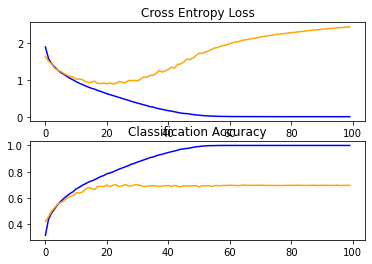

In [9]:
summarize_diagnostics(history)

The accuracy is around 68% for the test data.

The initialization of the weights was the default for the tensorflow model. The learning rate and moment were initialized based on a standard starting point for these types of models.

Using three layers is a basic starting point to create a CNN. Using the larger size and smaller filters allows the model to look more into the different components of the images as it is able to better analyze the different parts of the images. 

### Question 3

Visualize all of the 11×11×3 filters learned by the first convolutional layer as an RGB image array (I suggest making a large RGB image that is made up of each of the smaller images, so it will have 4 rows and 16 columns). Note that you will need to normalize each filter by contrast stretching to do this visualization, i.e., for each filter subtract the smallest value and then divide by the new largest value.

In [10]:
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 6, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

conv2d (11, 11, 3, 64)
64


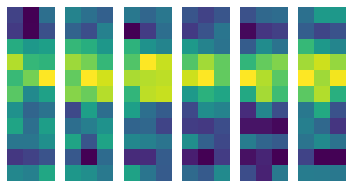

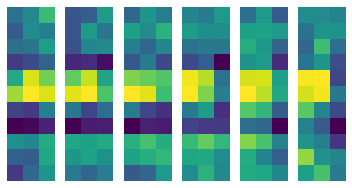

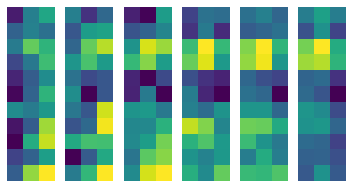

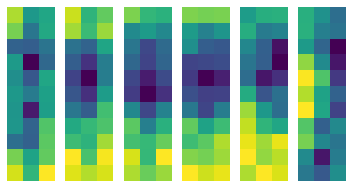

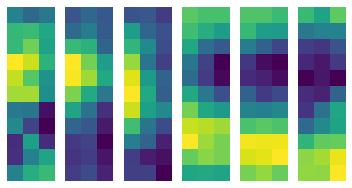

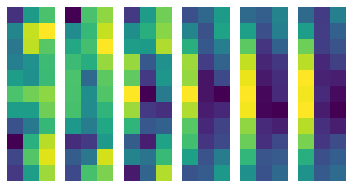

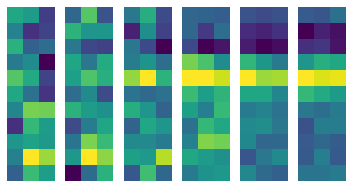

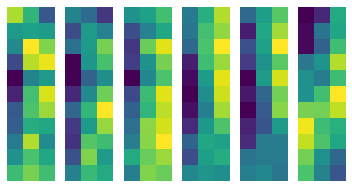

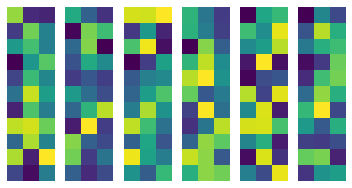

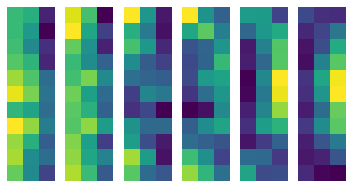

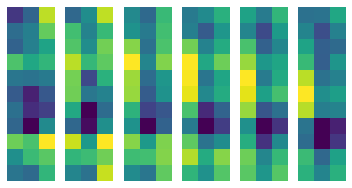

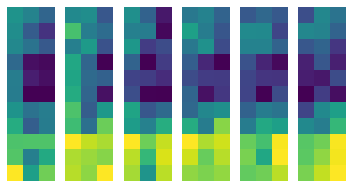

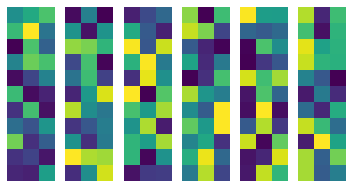

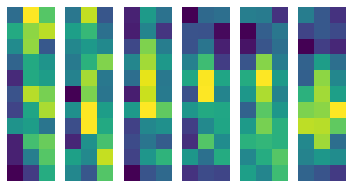

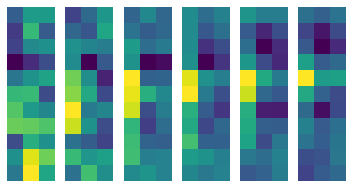

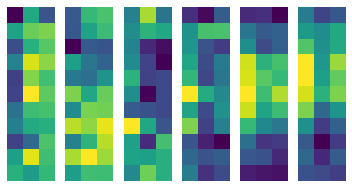

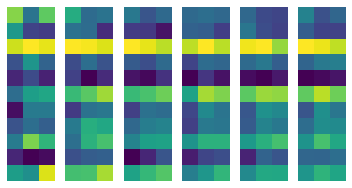

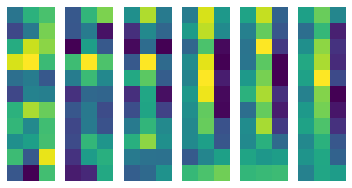

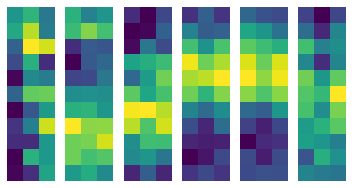

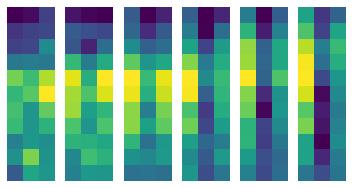

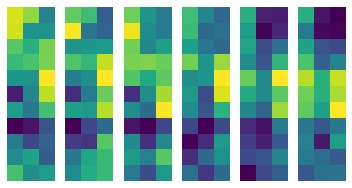

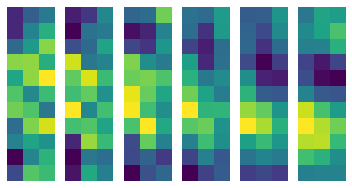

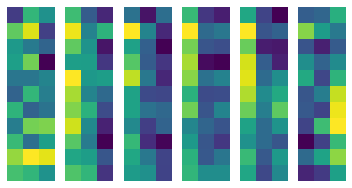

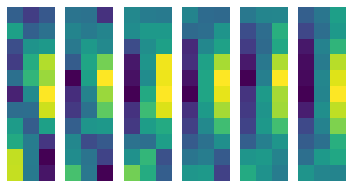

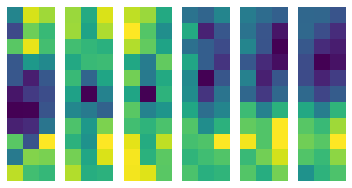

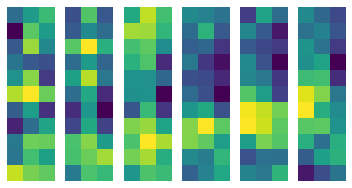

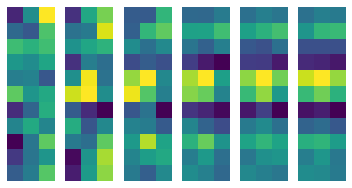

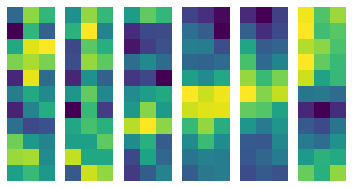

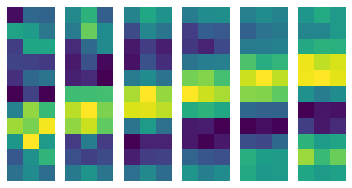

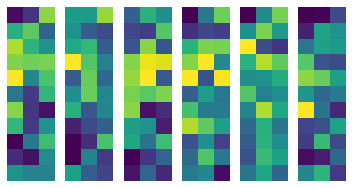

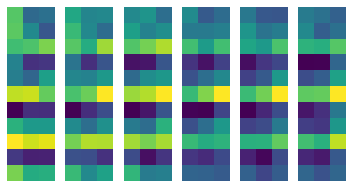

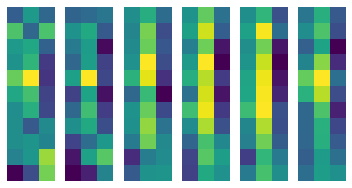

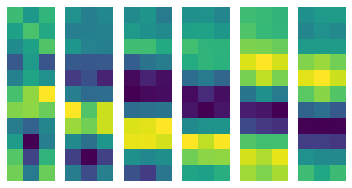

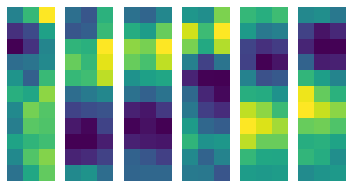

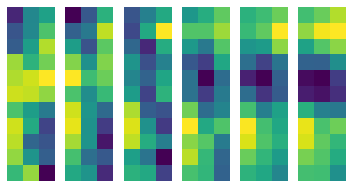

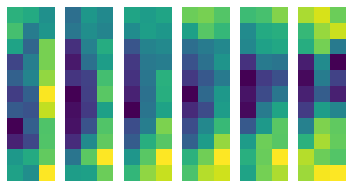

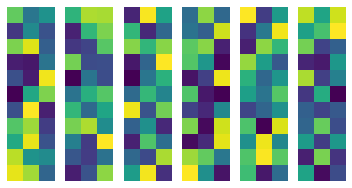

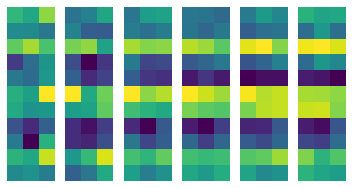

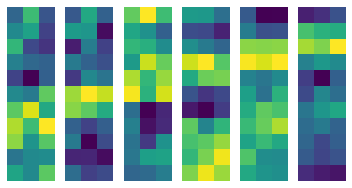

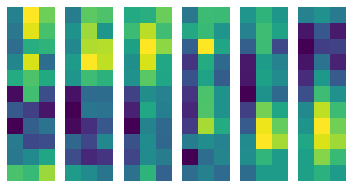

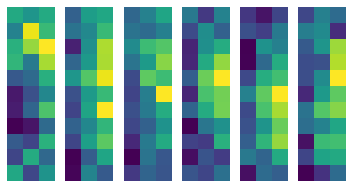

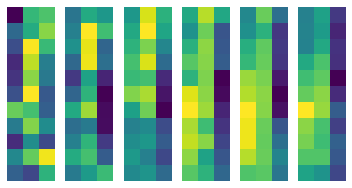

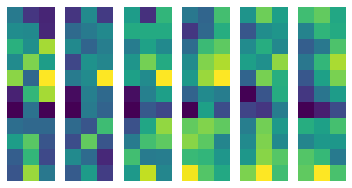

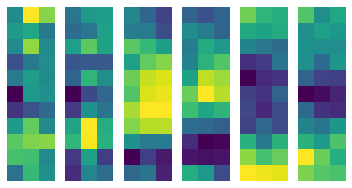

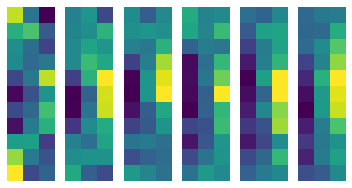

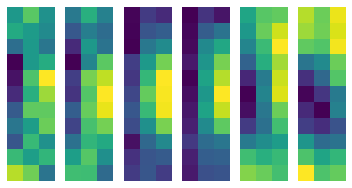

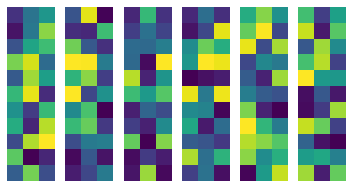

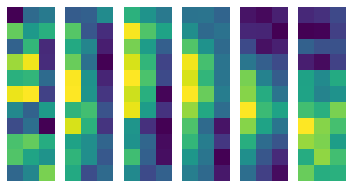

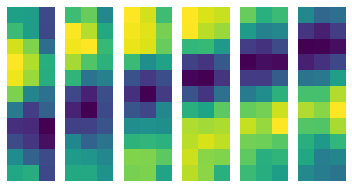

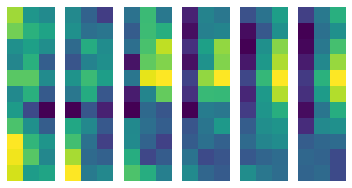

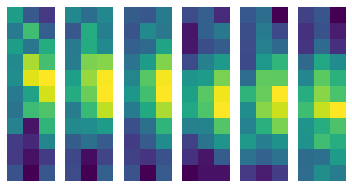

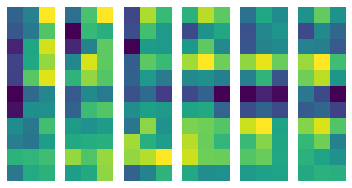

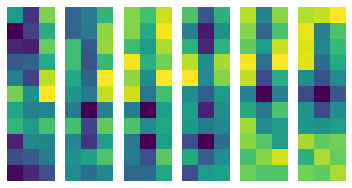

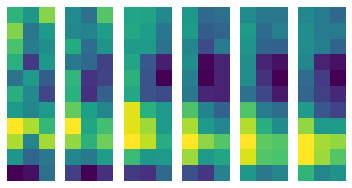

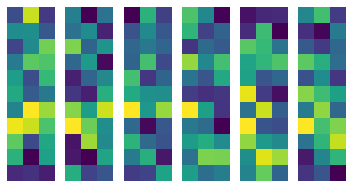

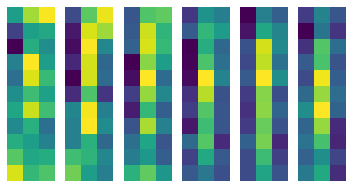

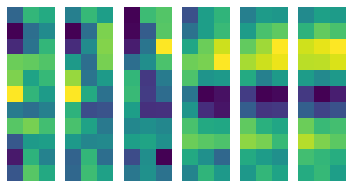

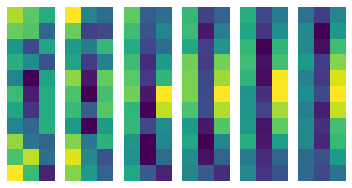

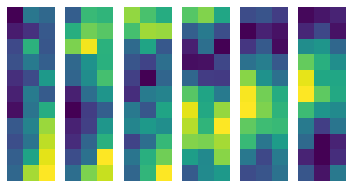

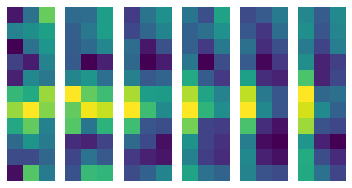

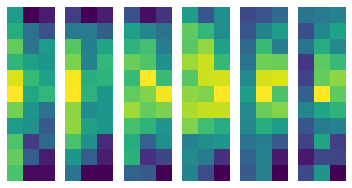

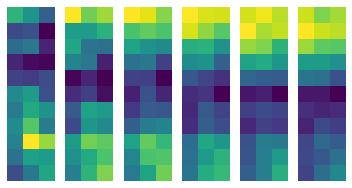

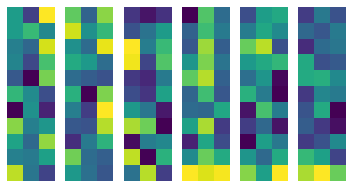

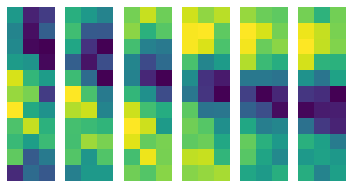

conv2d_1 (3, 3, 64, 128)
128


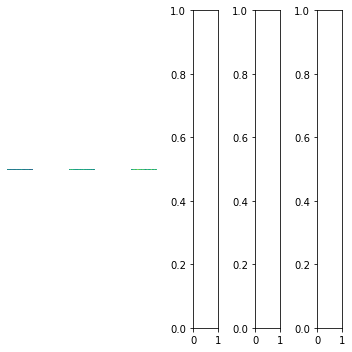

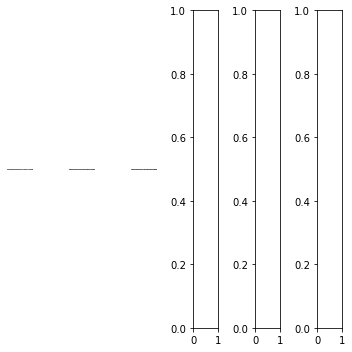

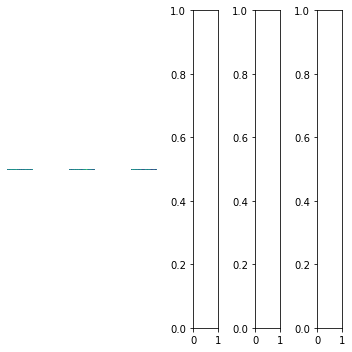

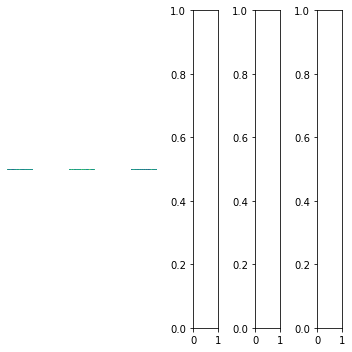

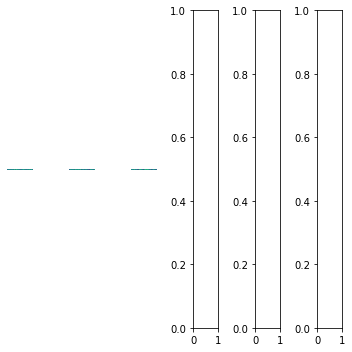

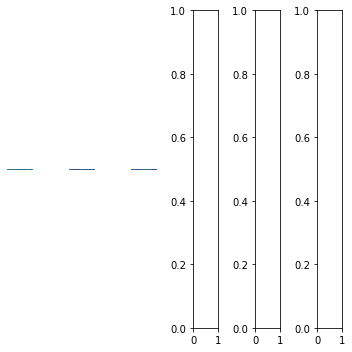

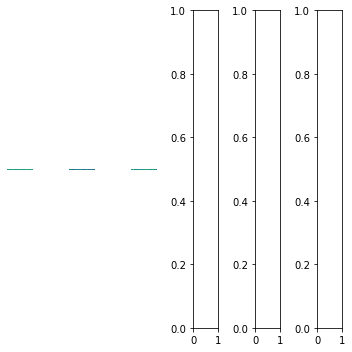

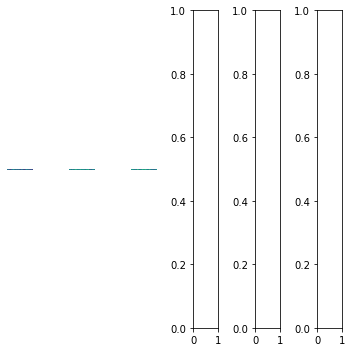

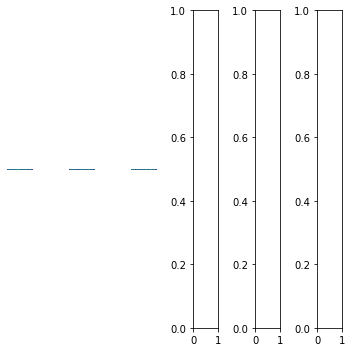

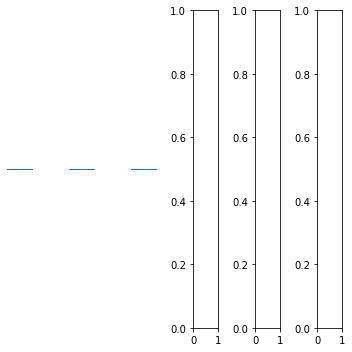

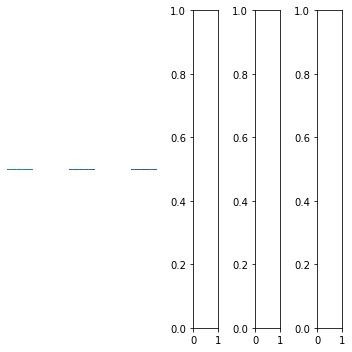

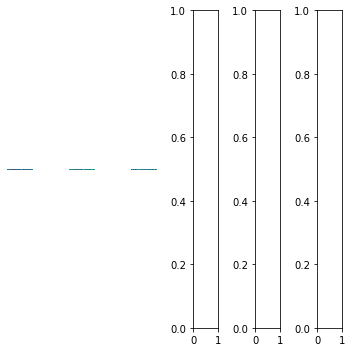

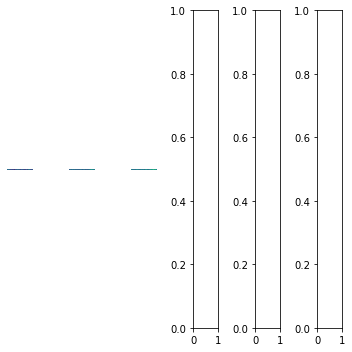

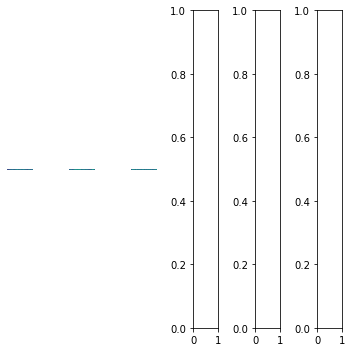

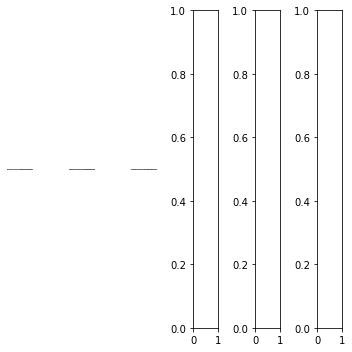

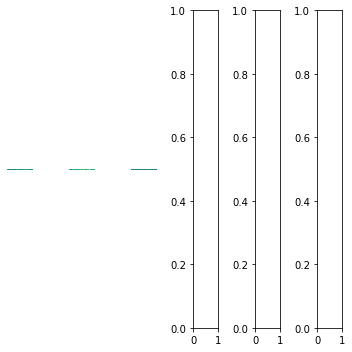

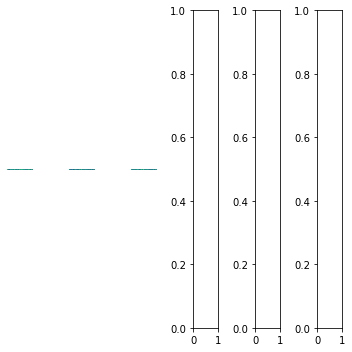

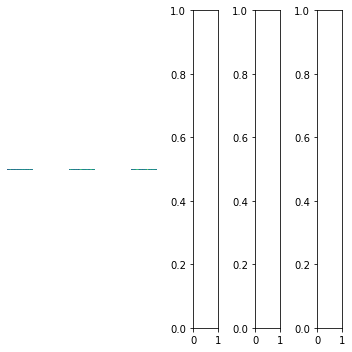

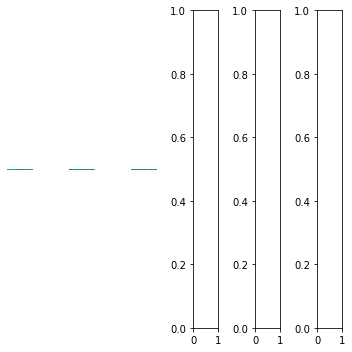

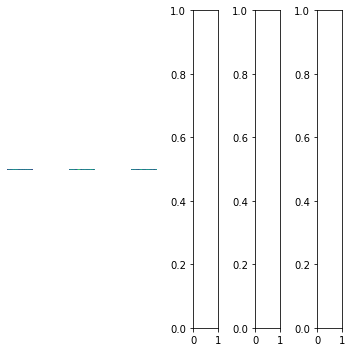

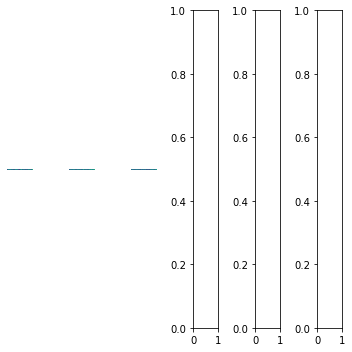

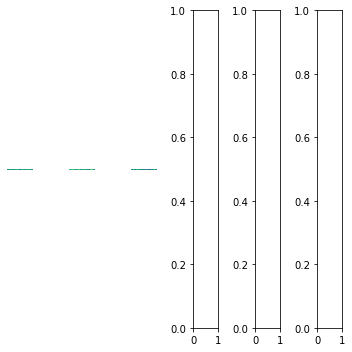

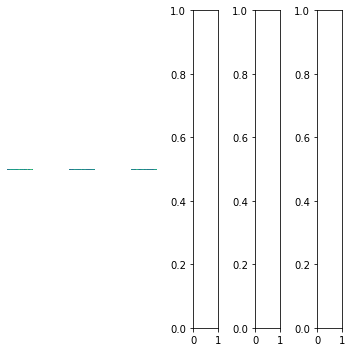

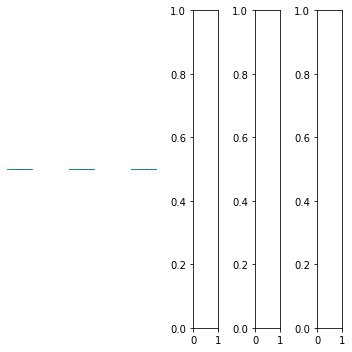

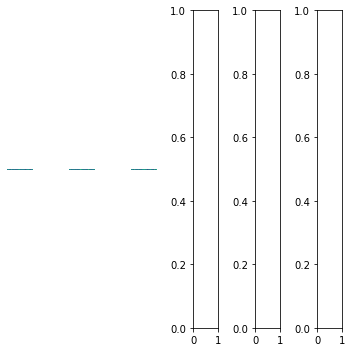

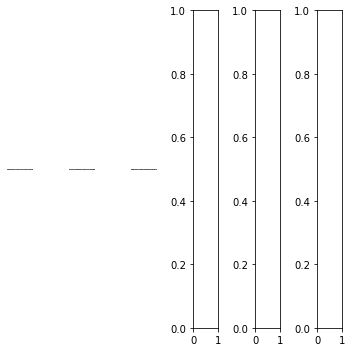

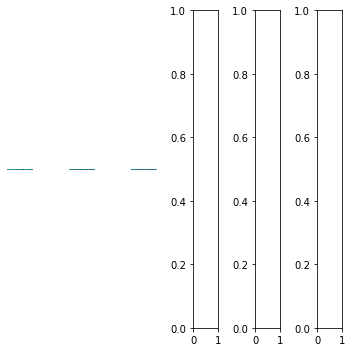

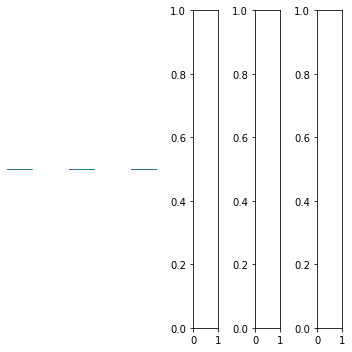

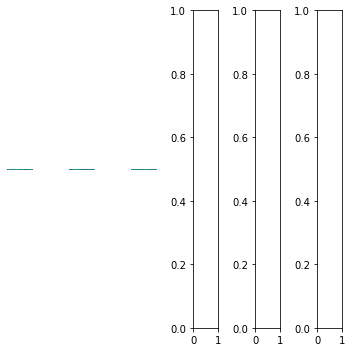

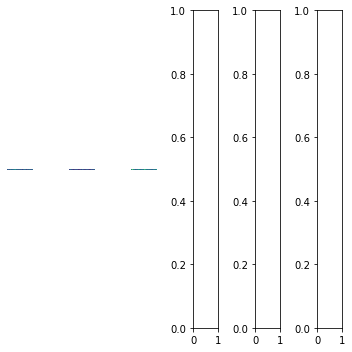

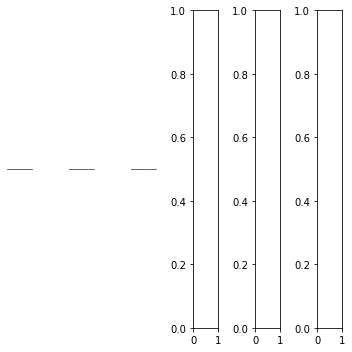

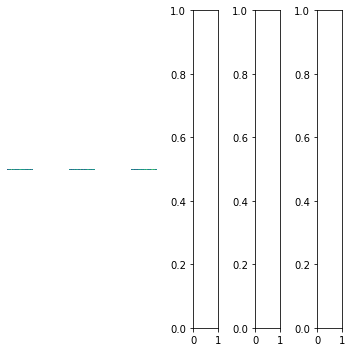

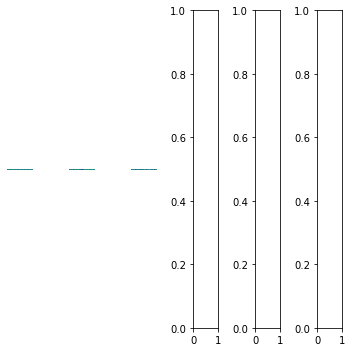

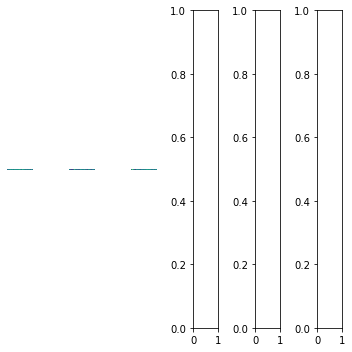

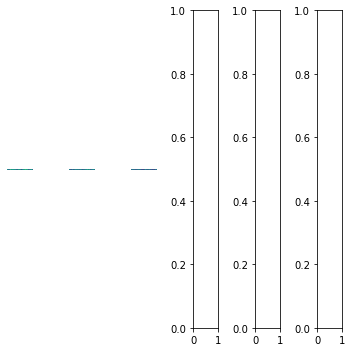

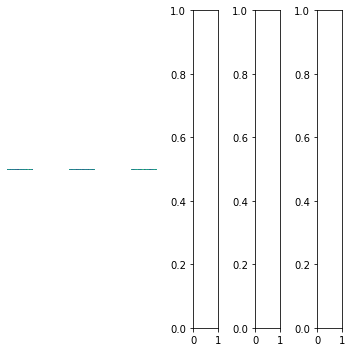

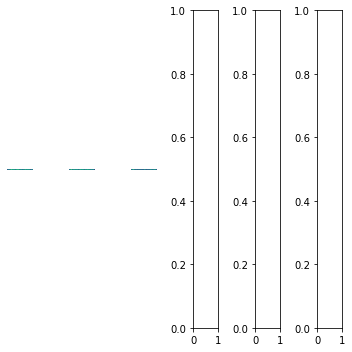

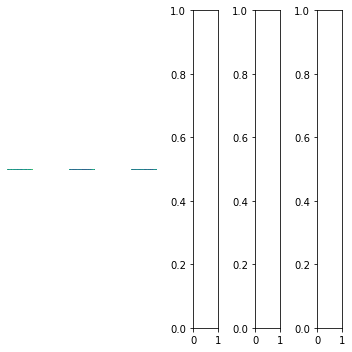

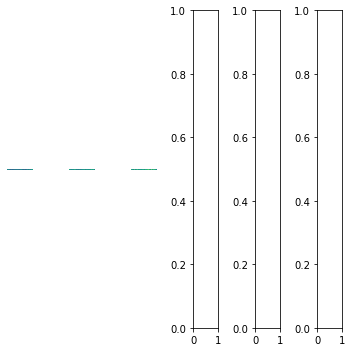

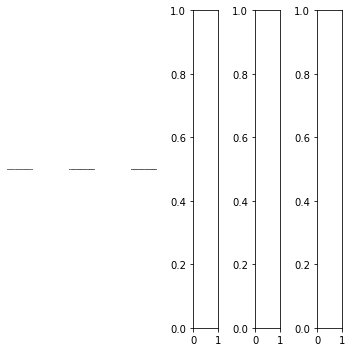

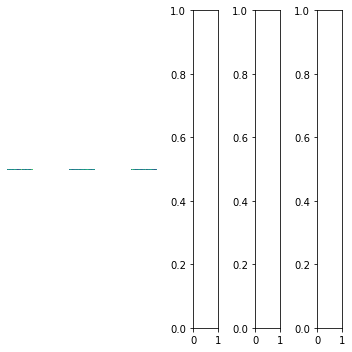

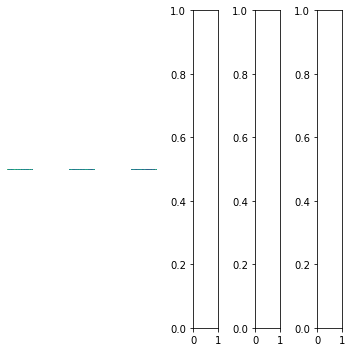

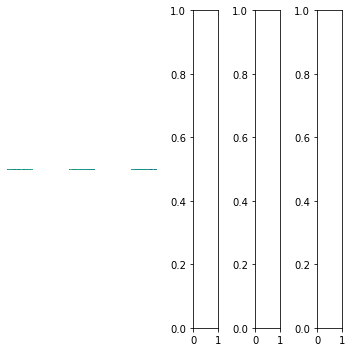

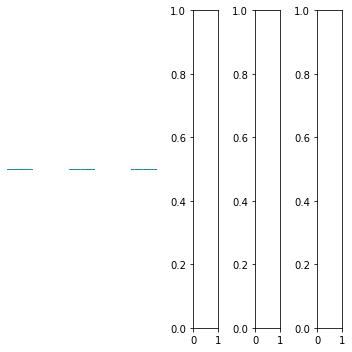

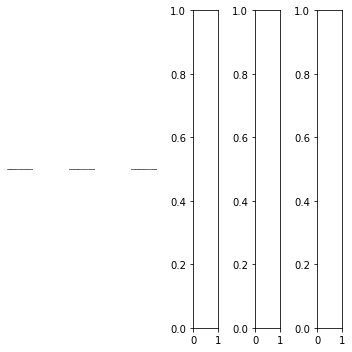

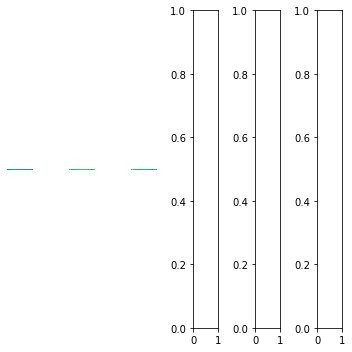

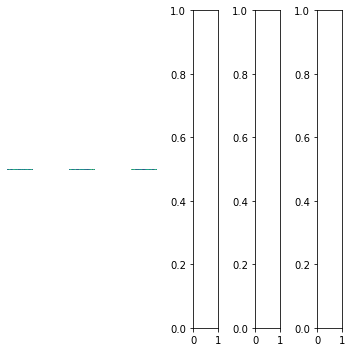

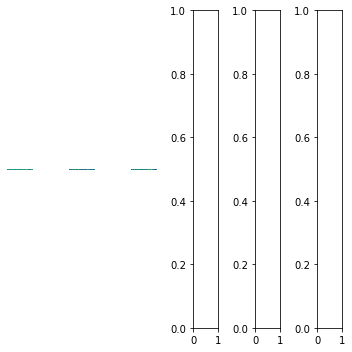

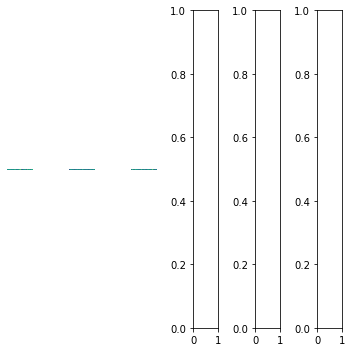

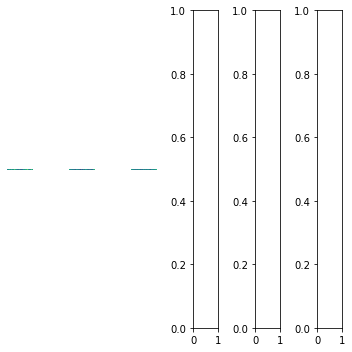

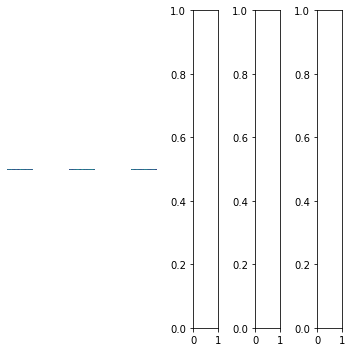

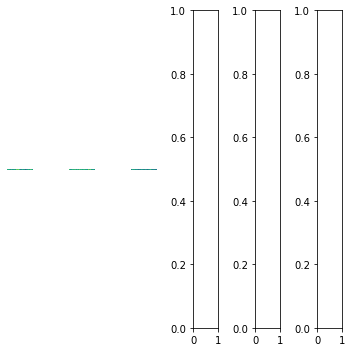

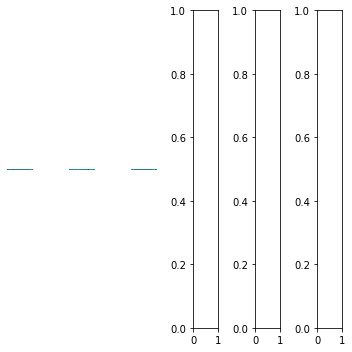

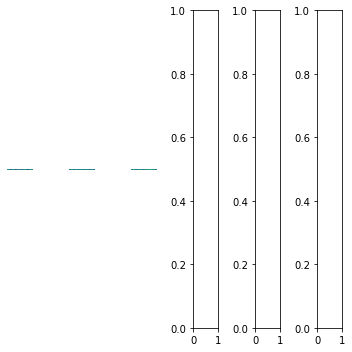

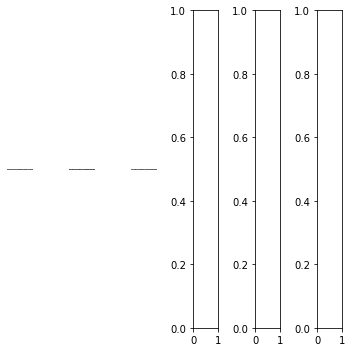

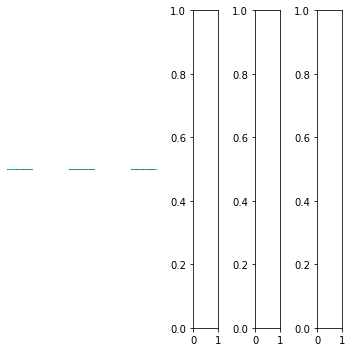

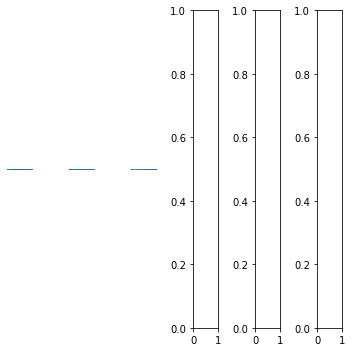

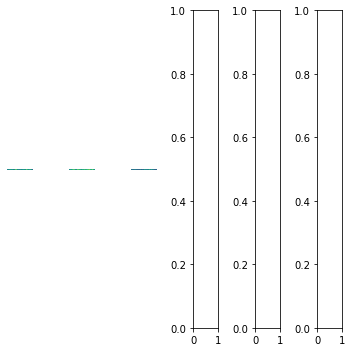

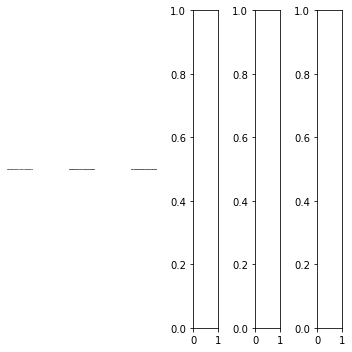

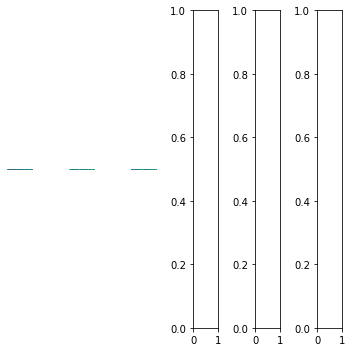

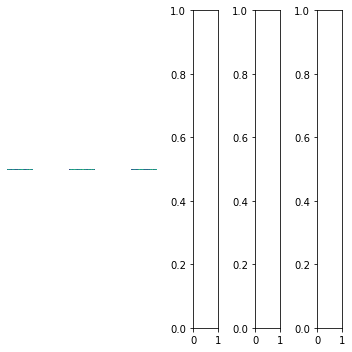

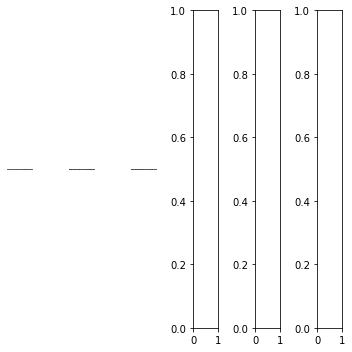

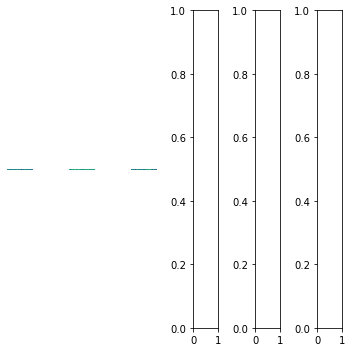

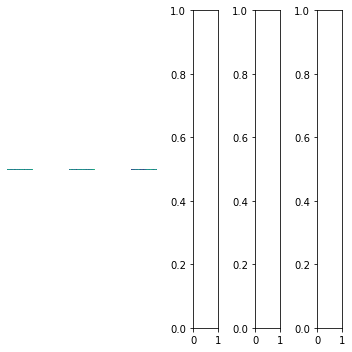

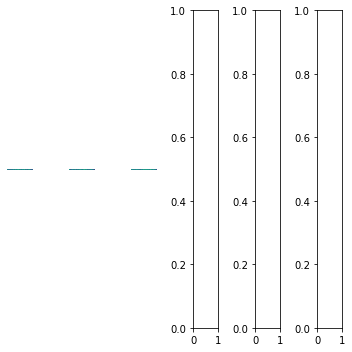

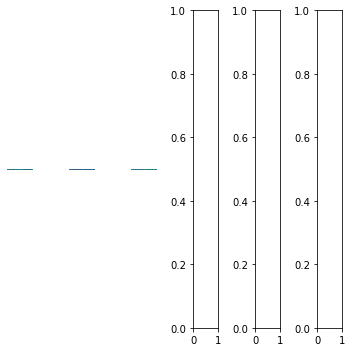

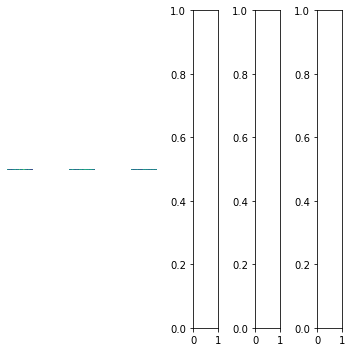

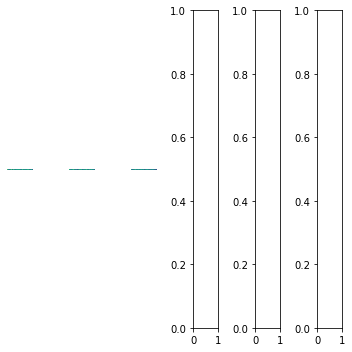

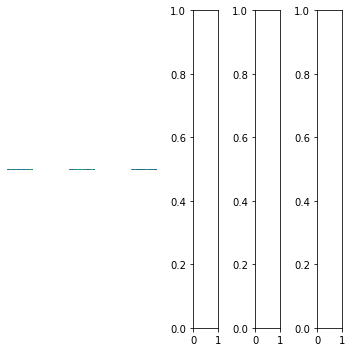

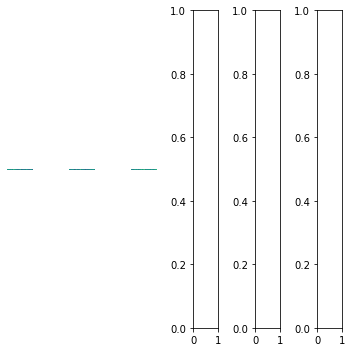

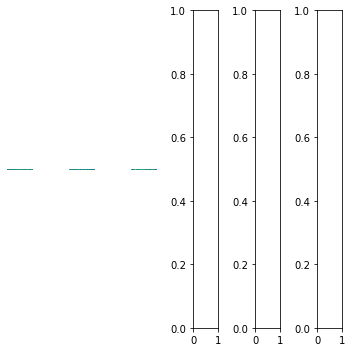

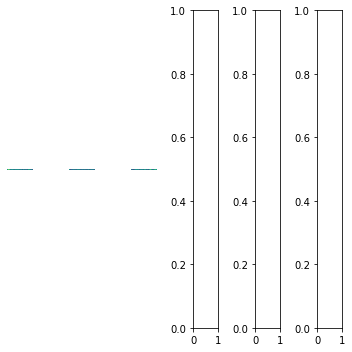

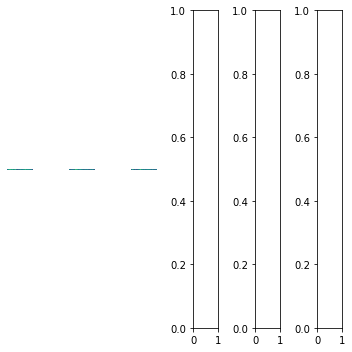

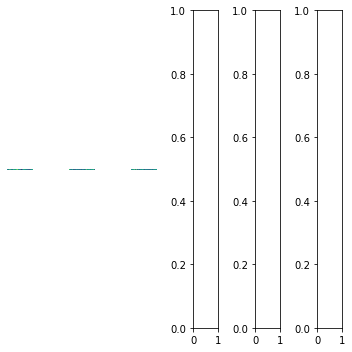

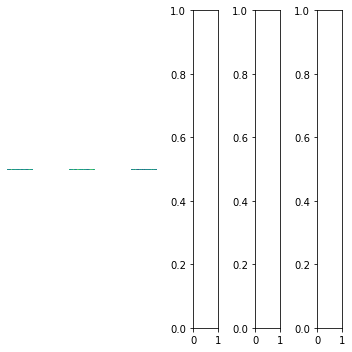

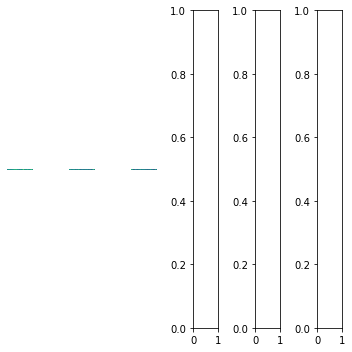

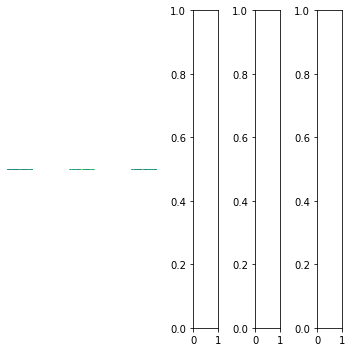

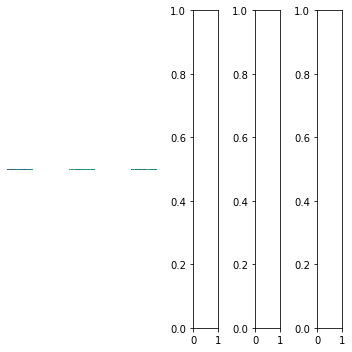

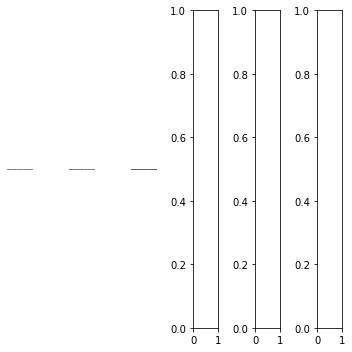

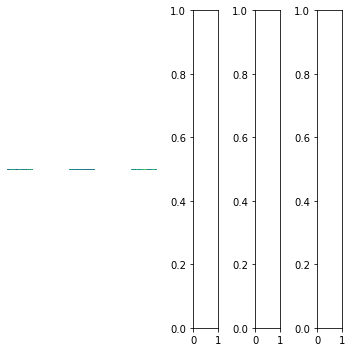

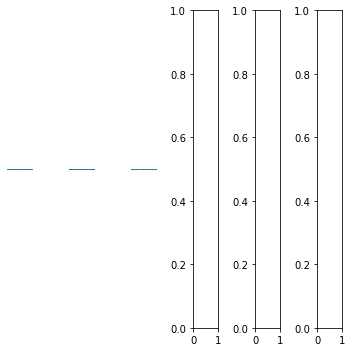

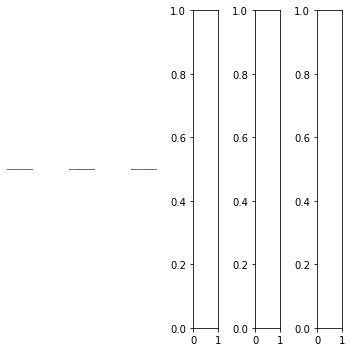

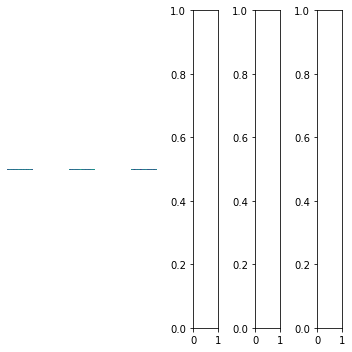

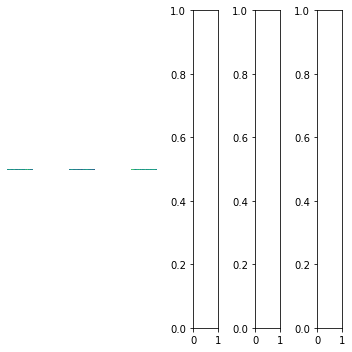

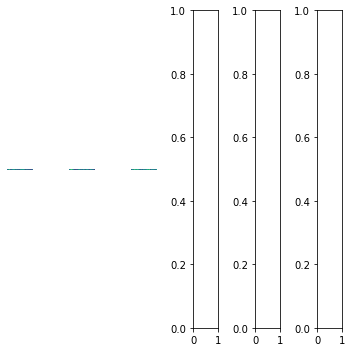

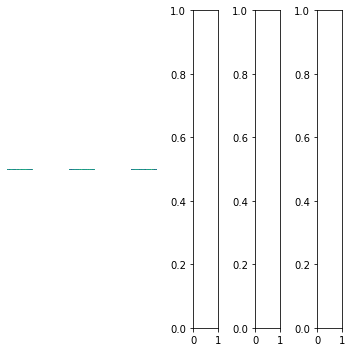

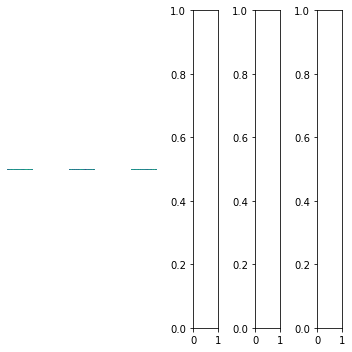

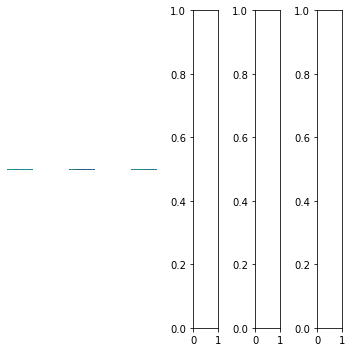

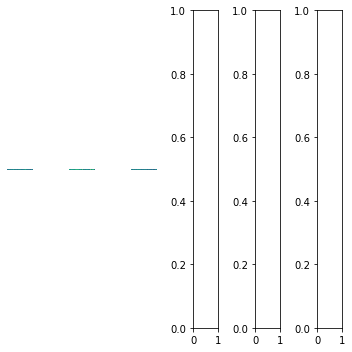

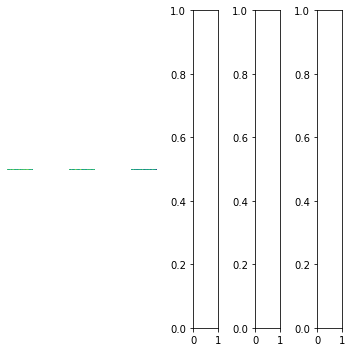

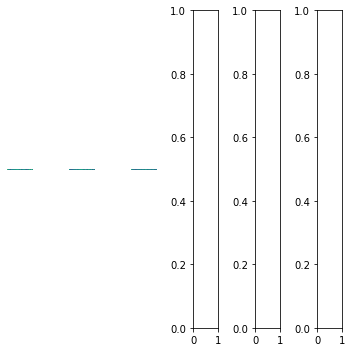

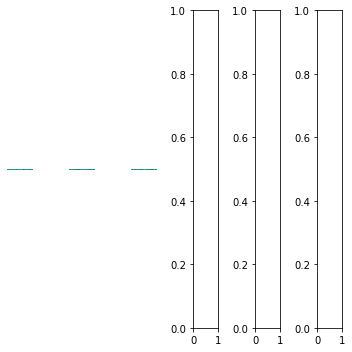

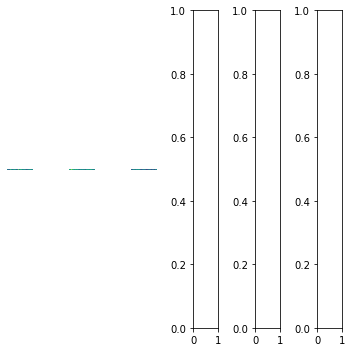

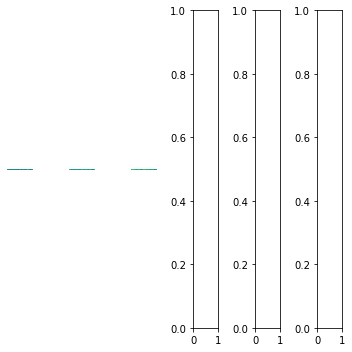

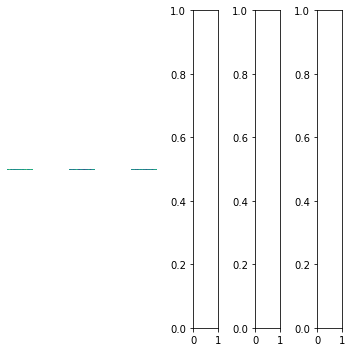

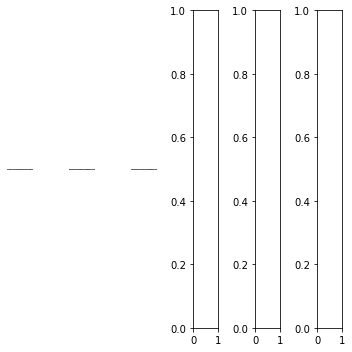

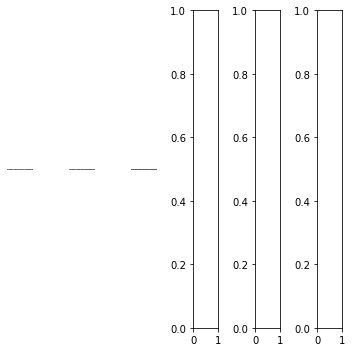

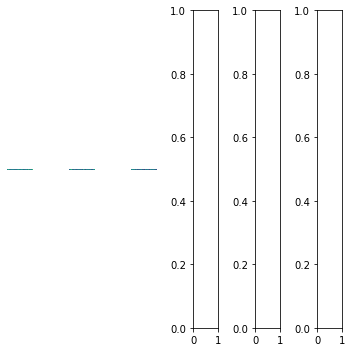

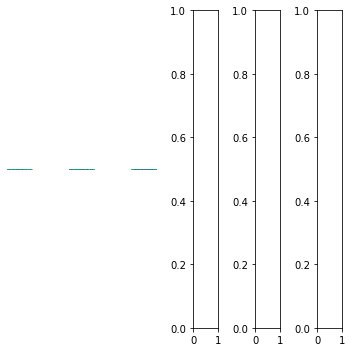

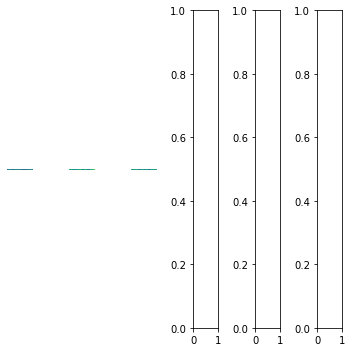

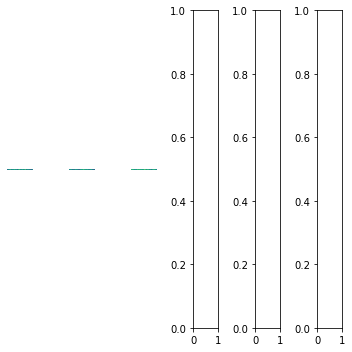

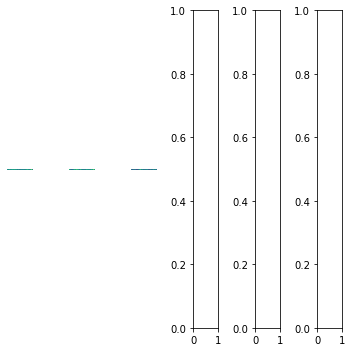

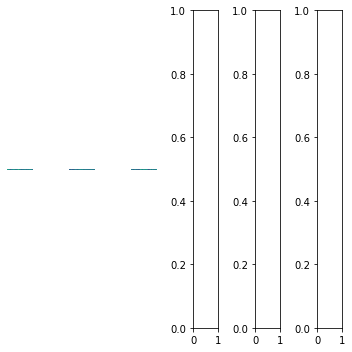

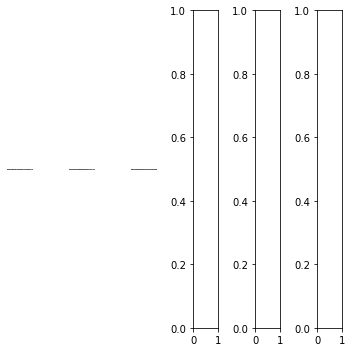

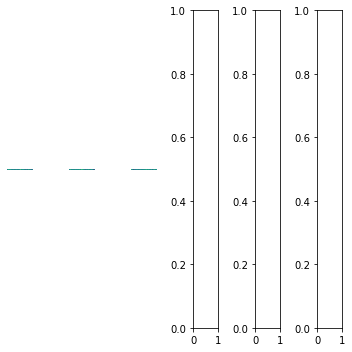

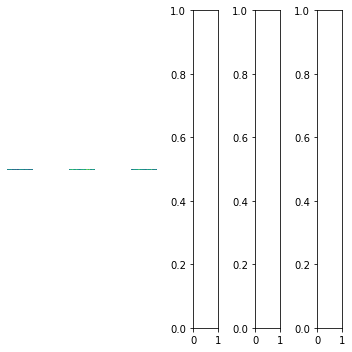

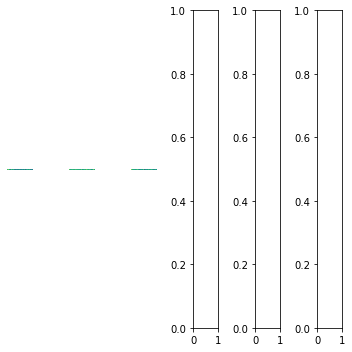

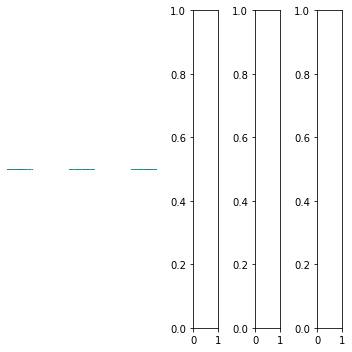

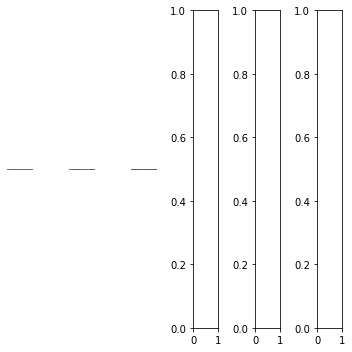

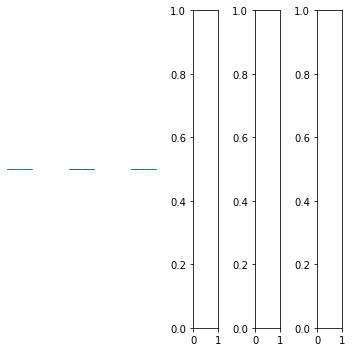

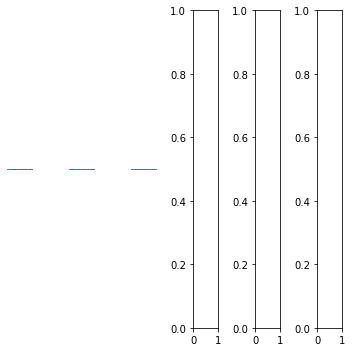

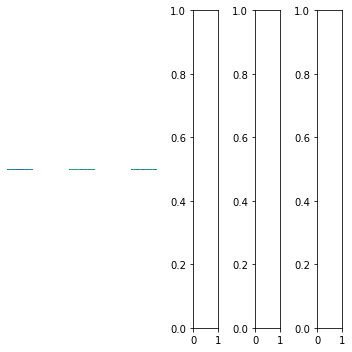

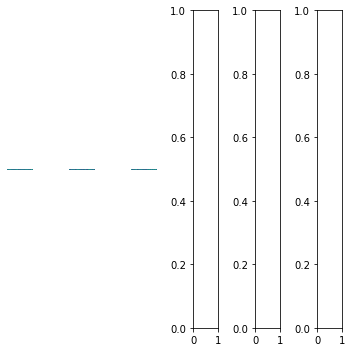

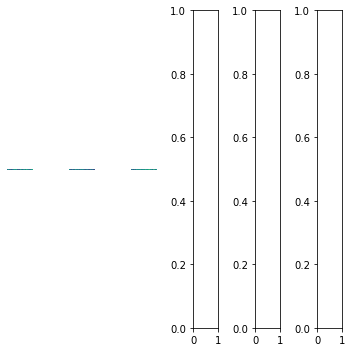

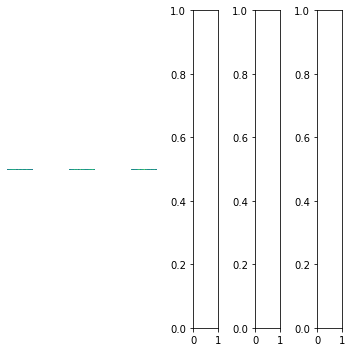

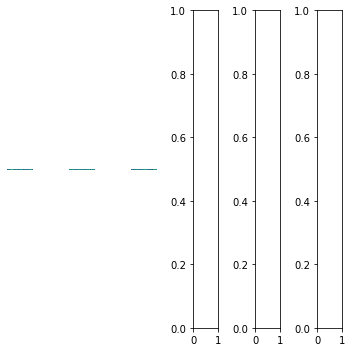

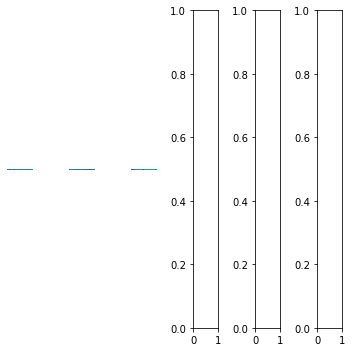

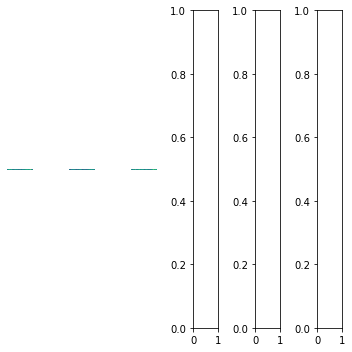

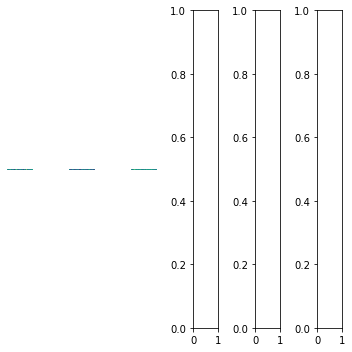

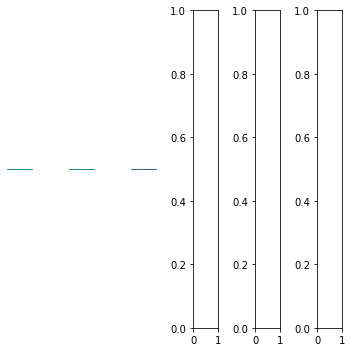

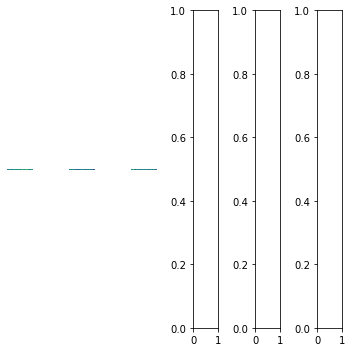

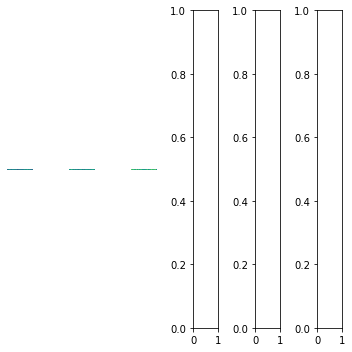

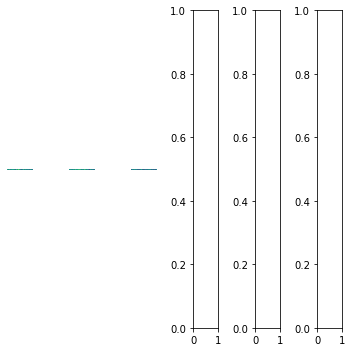

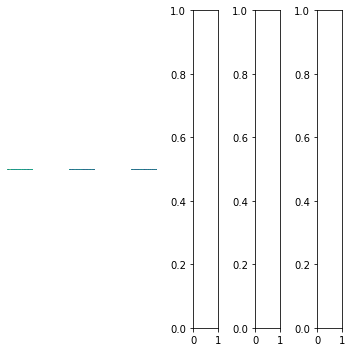

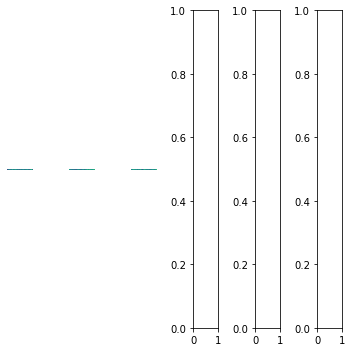

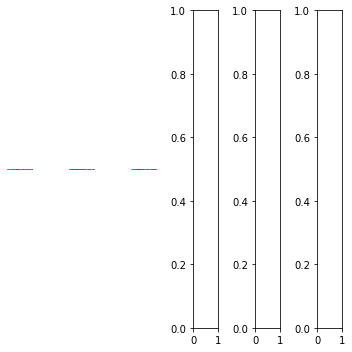

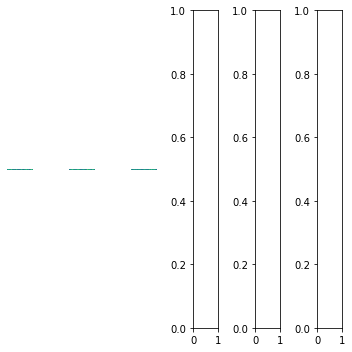

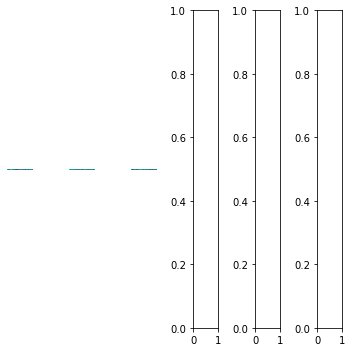

conv2d_2 (3, 3, 128, 128)
128


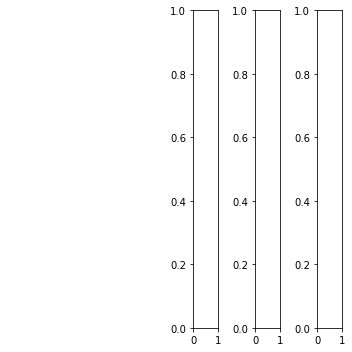

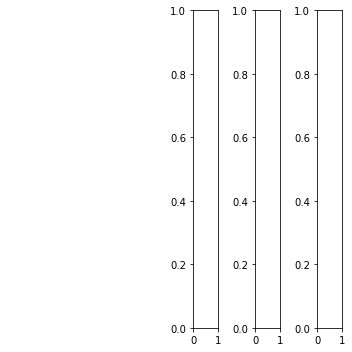

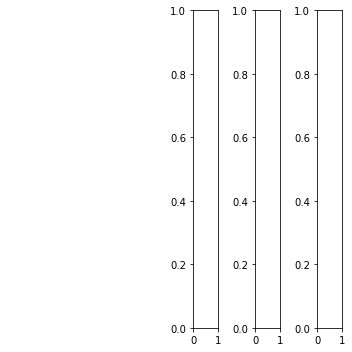

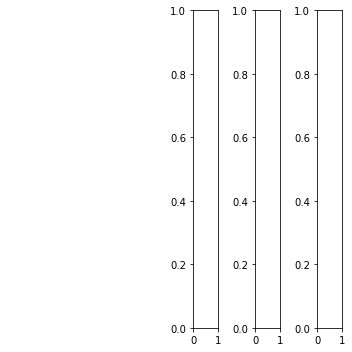

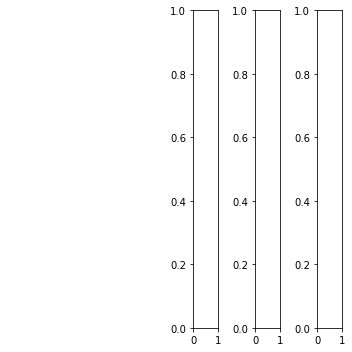

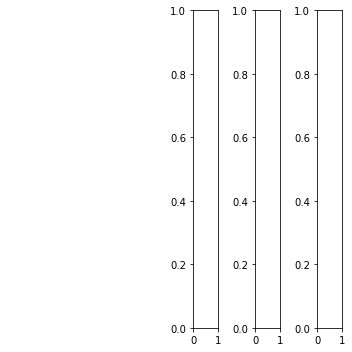

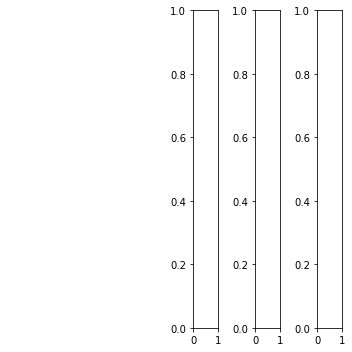

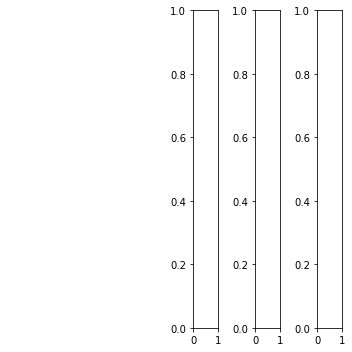

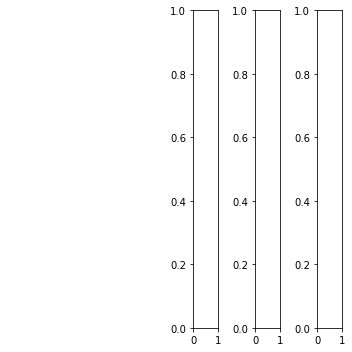

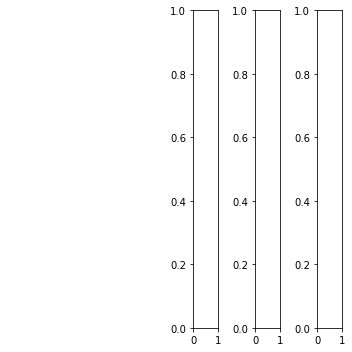

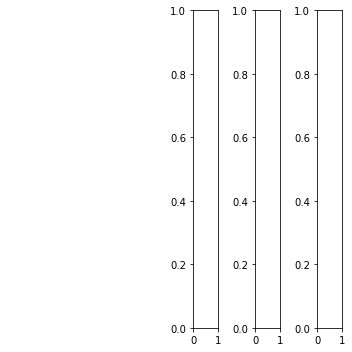

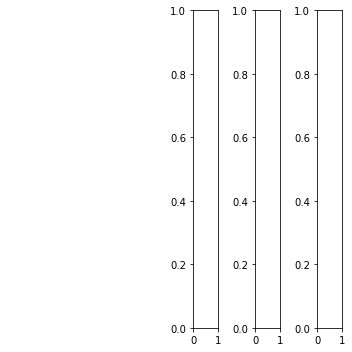

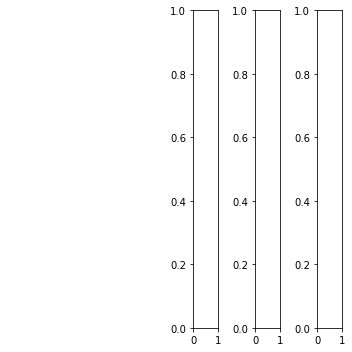

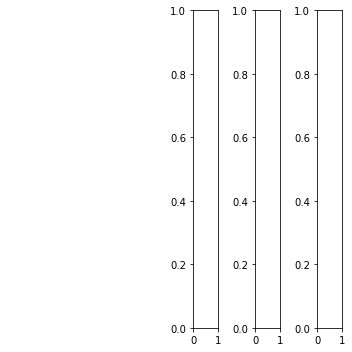

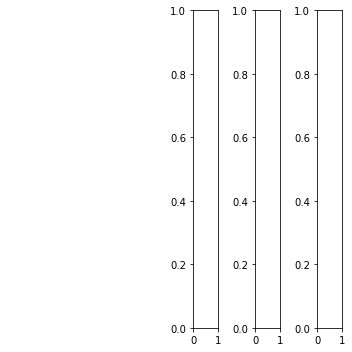

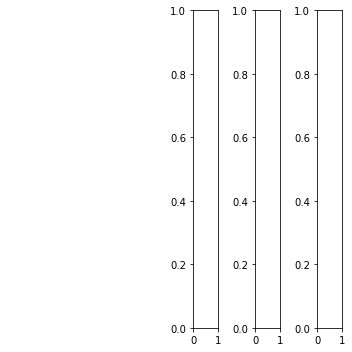

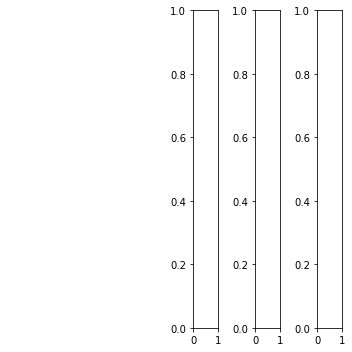

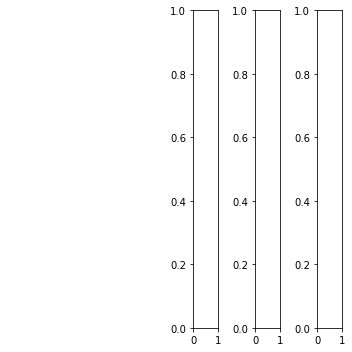

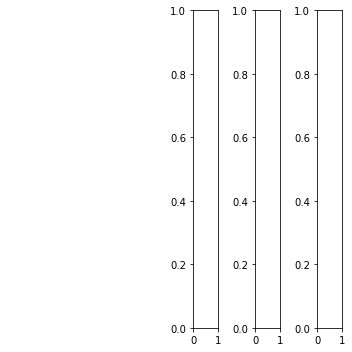

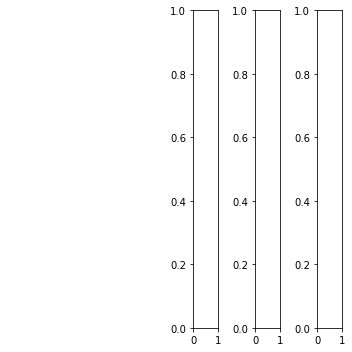

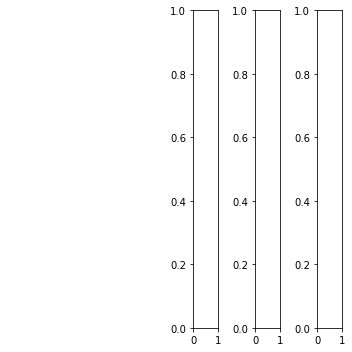

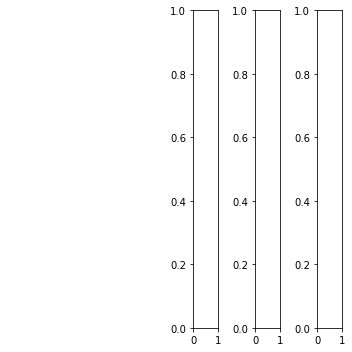

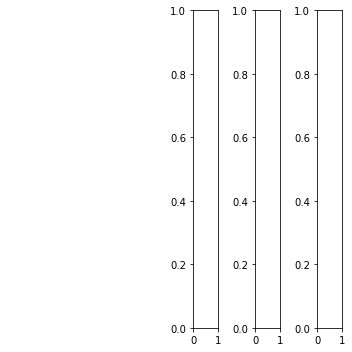

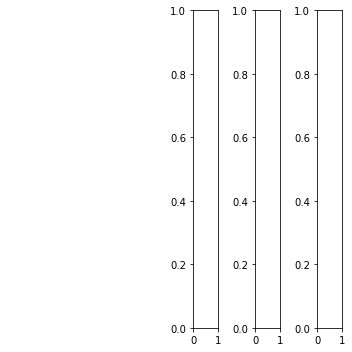

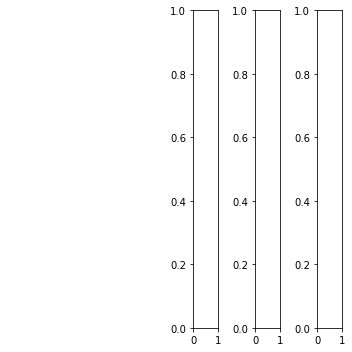

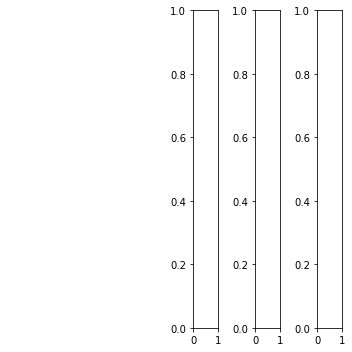

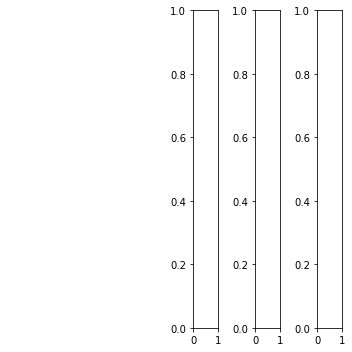

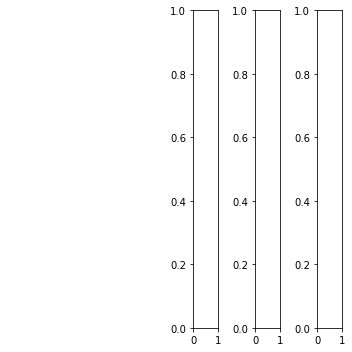

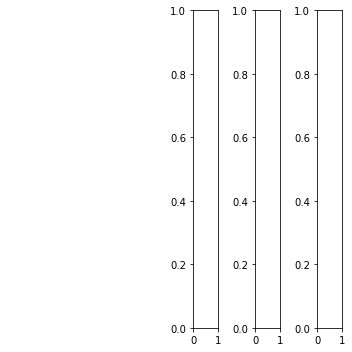

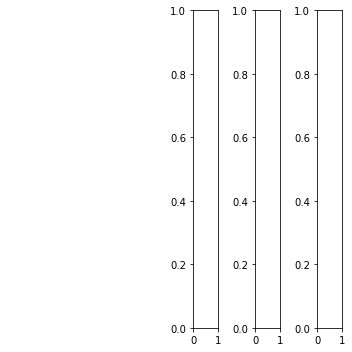

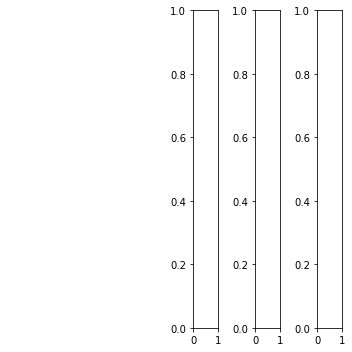

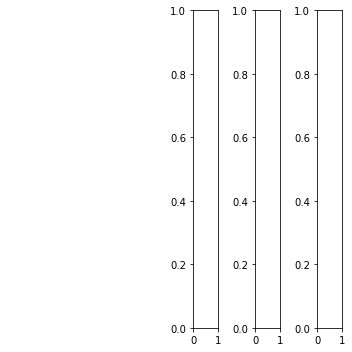

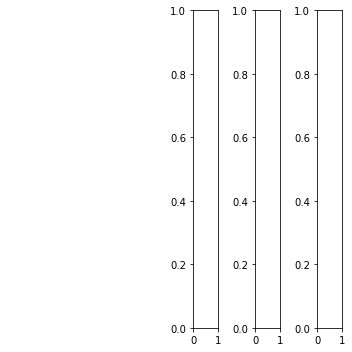

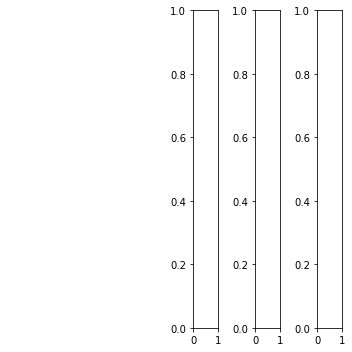

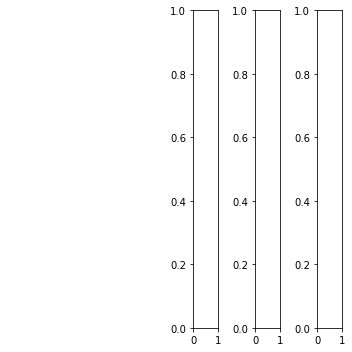

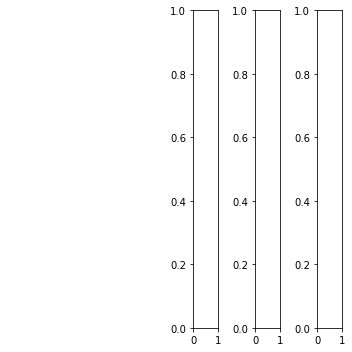

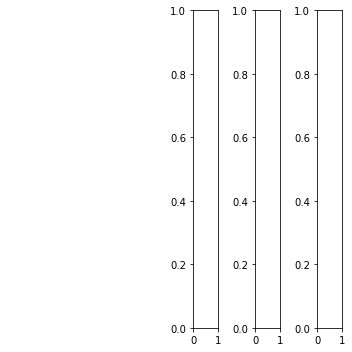

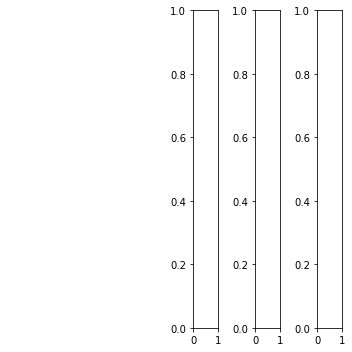

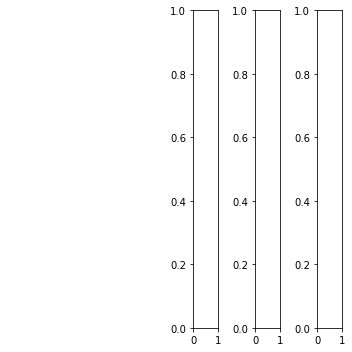

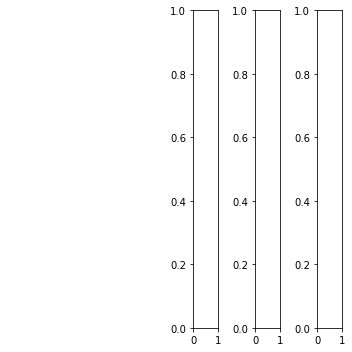

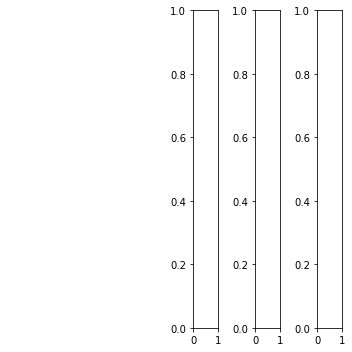

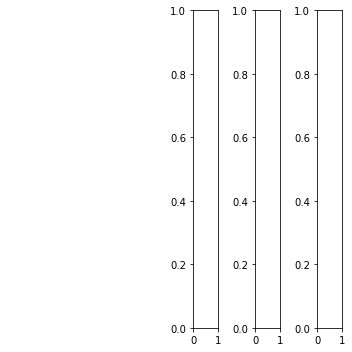

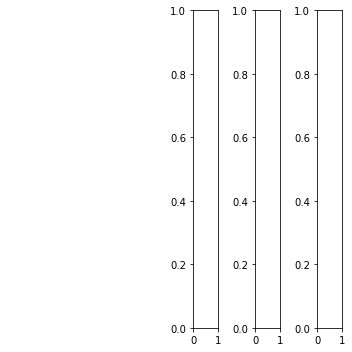

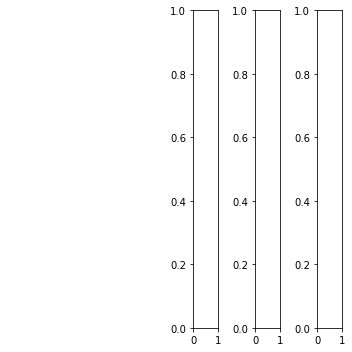

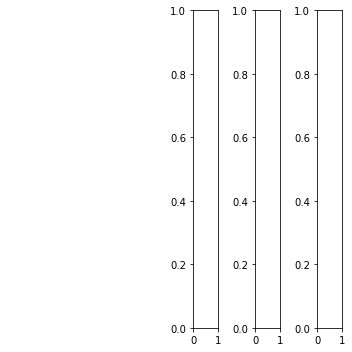

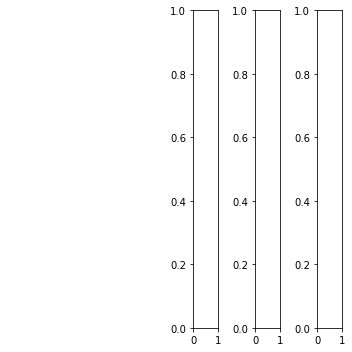

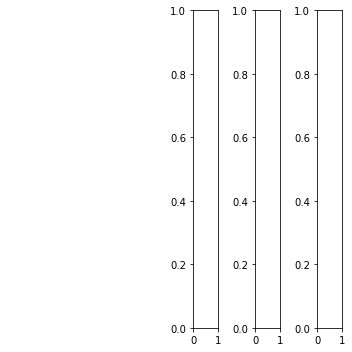

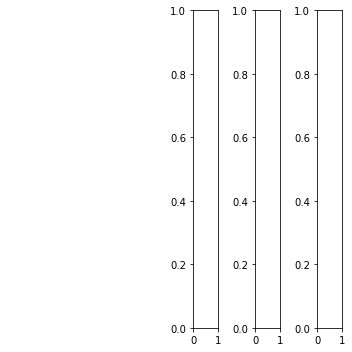

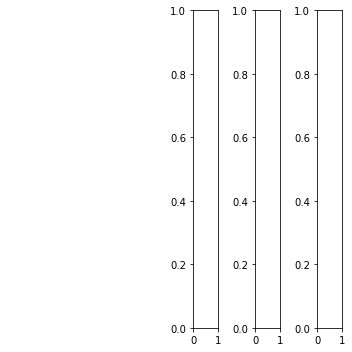

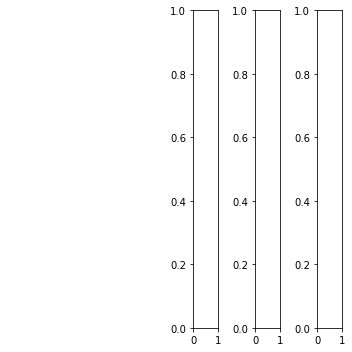

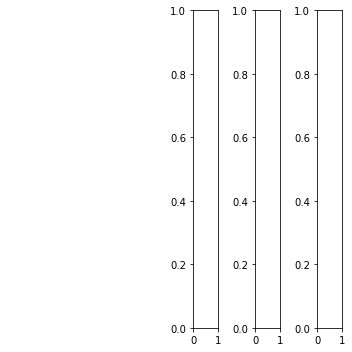

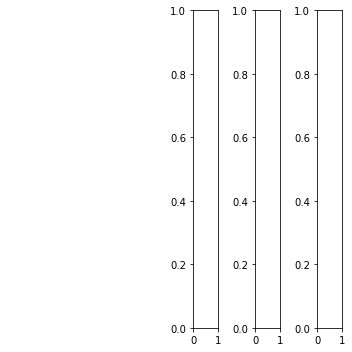

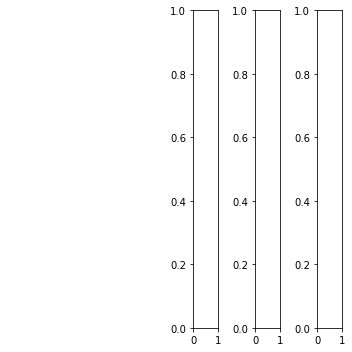

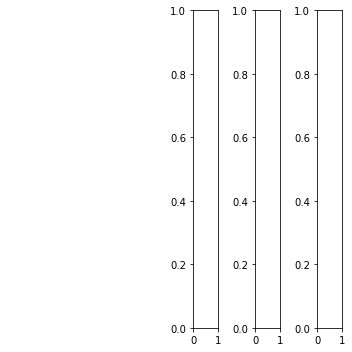

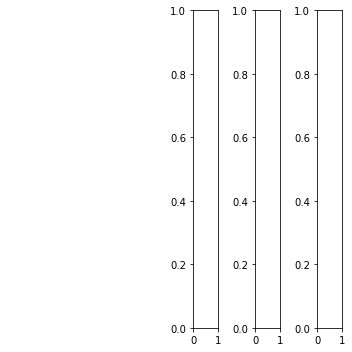

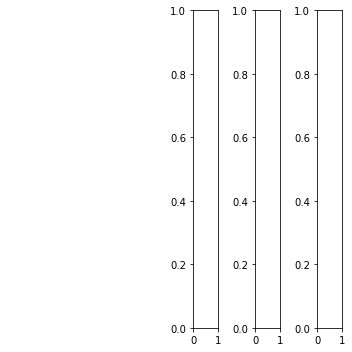

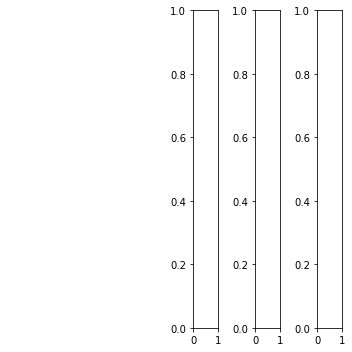

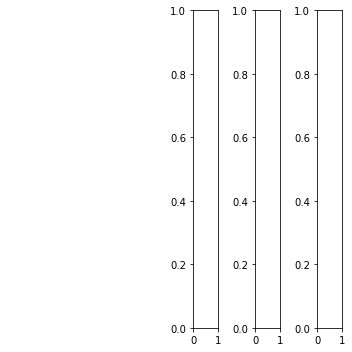

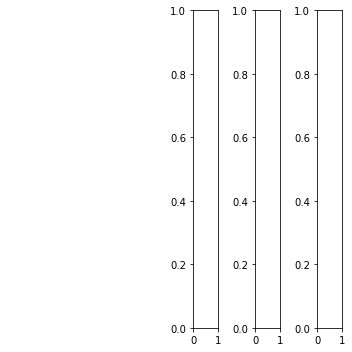

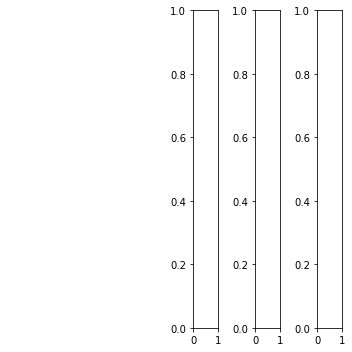

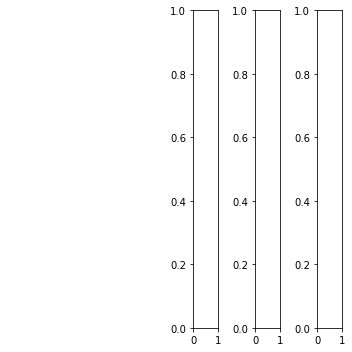

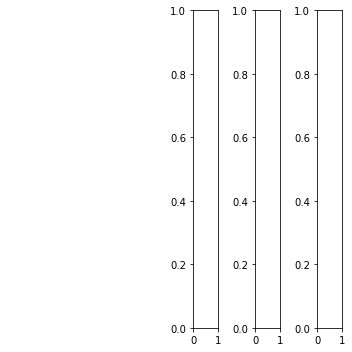

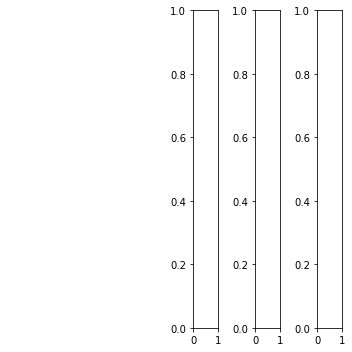

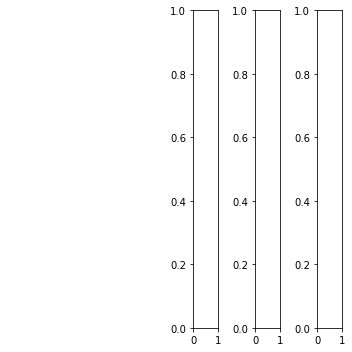

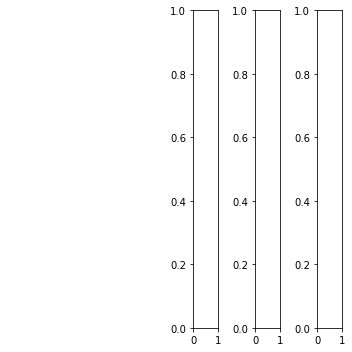

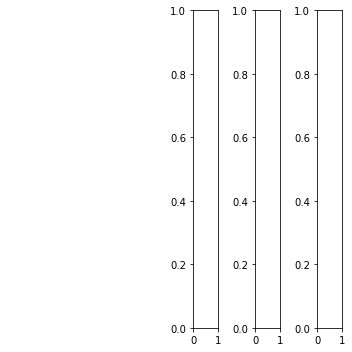

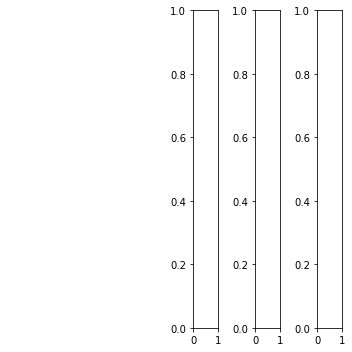

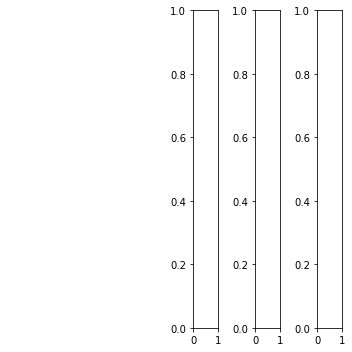

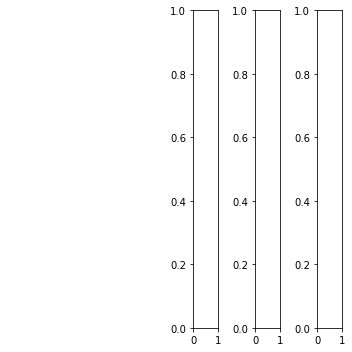

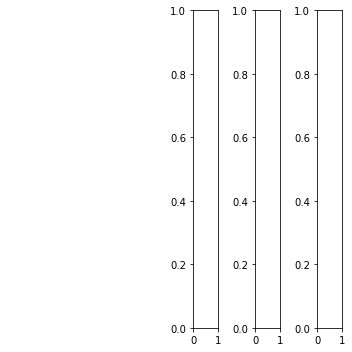

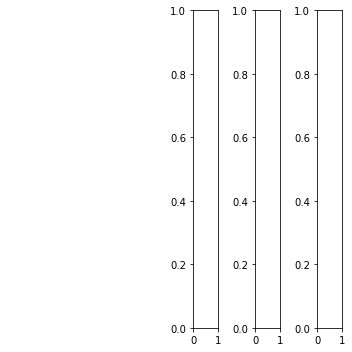

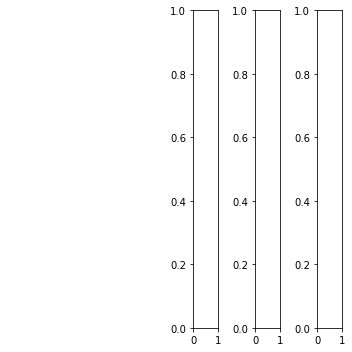

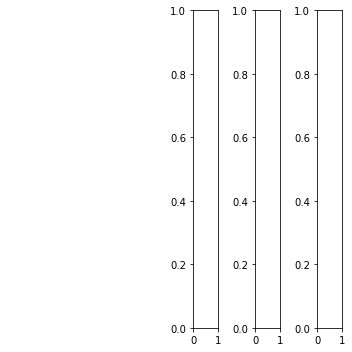

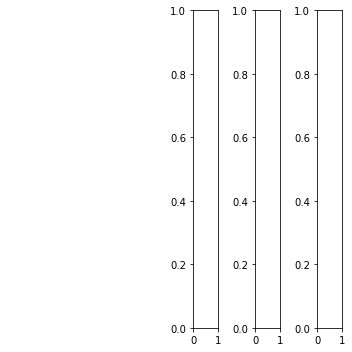

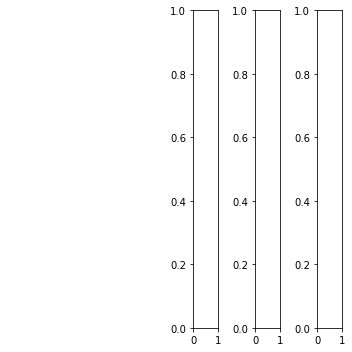

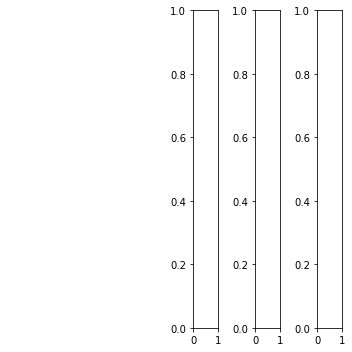

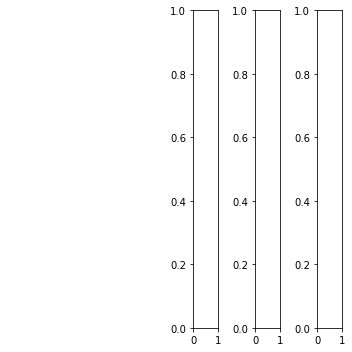

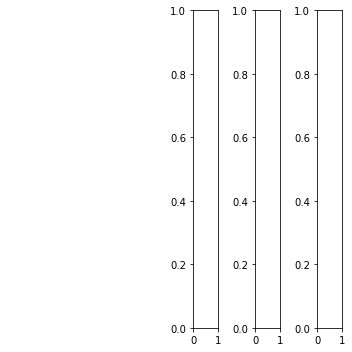

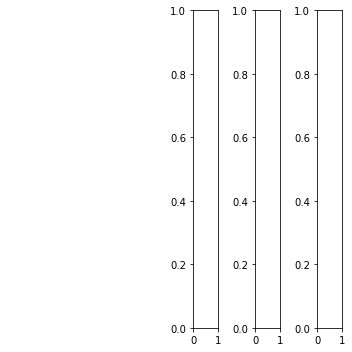

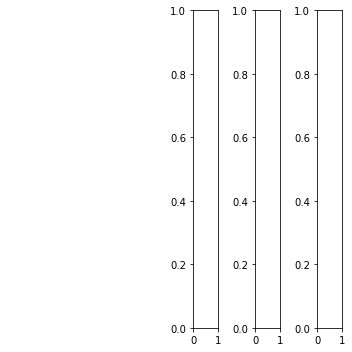

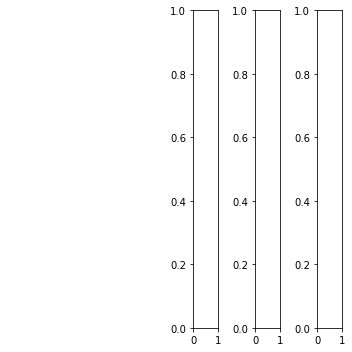

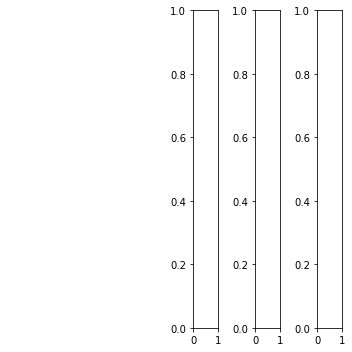

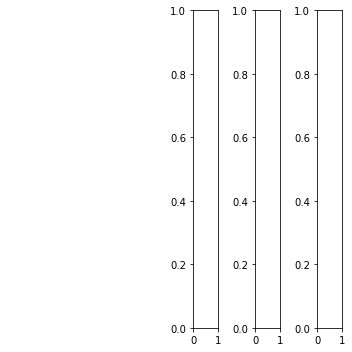

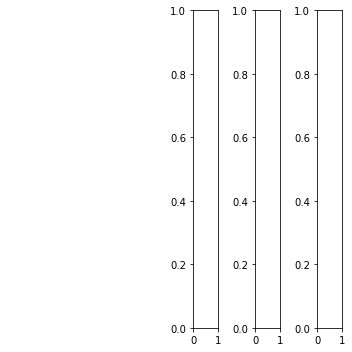

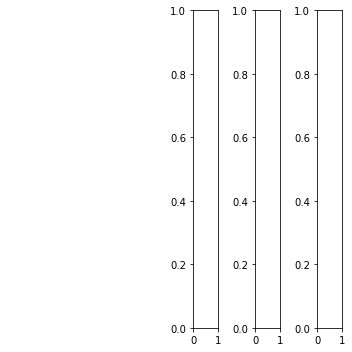

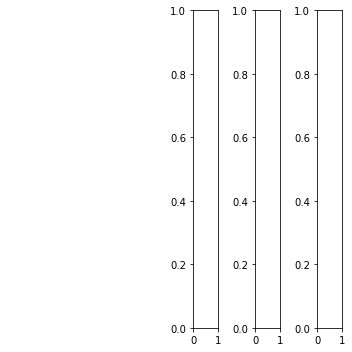

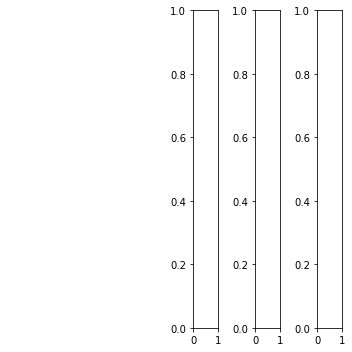

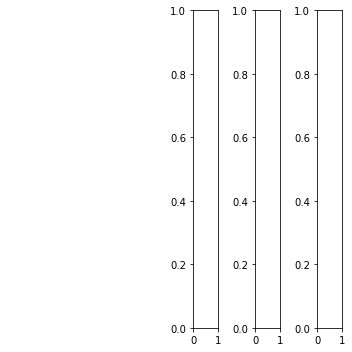

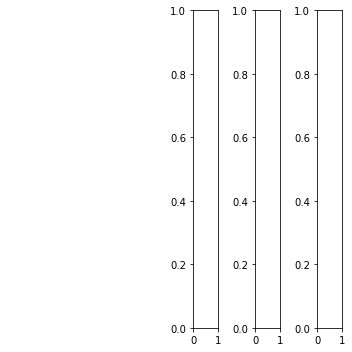

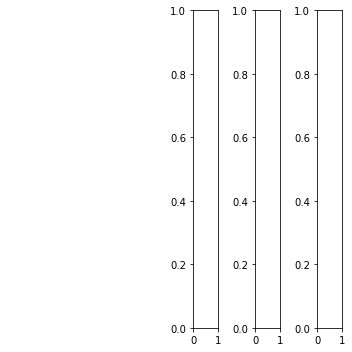

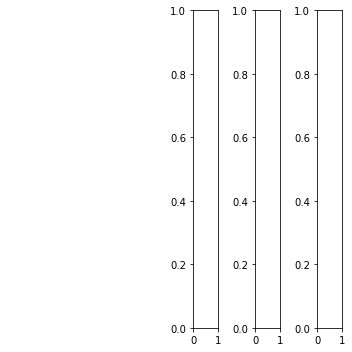

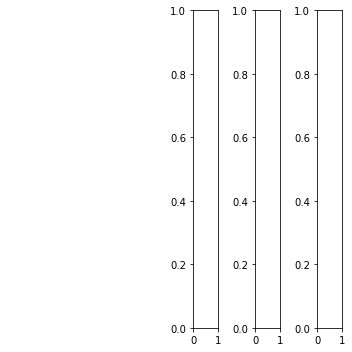

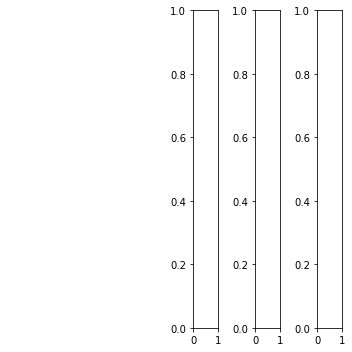

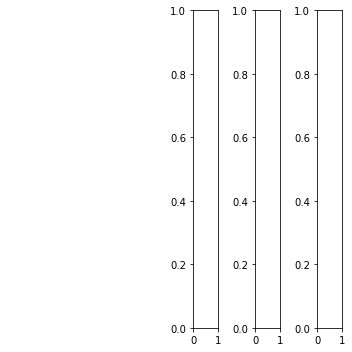

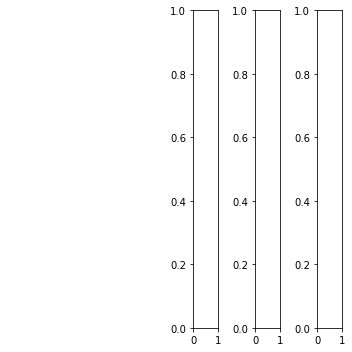

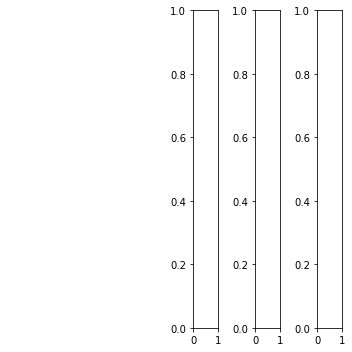

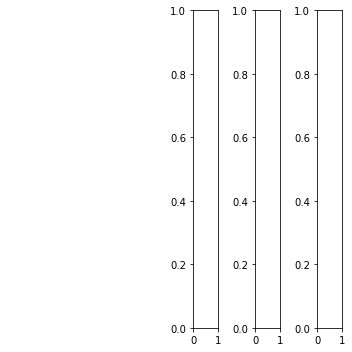

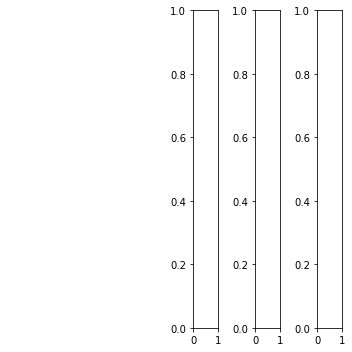

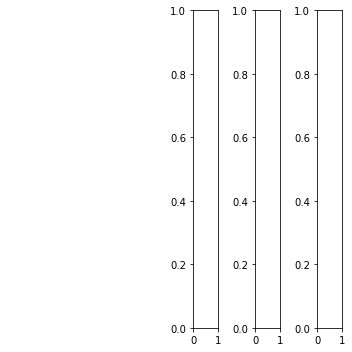

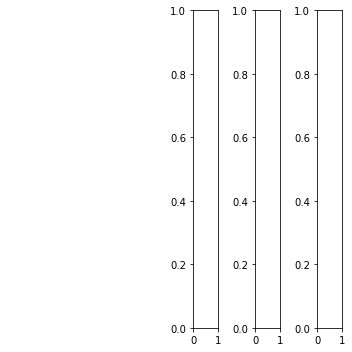

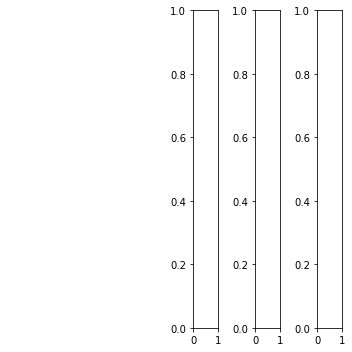

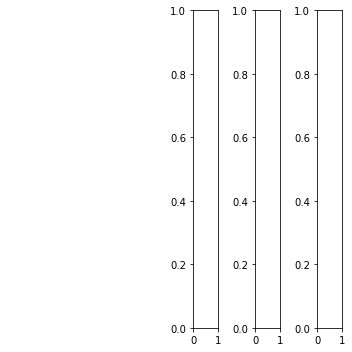

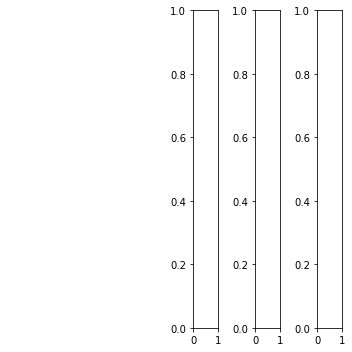

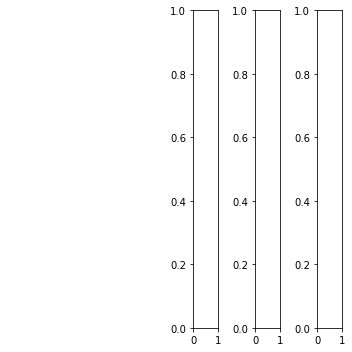

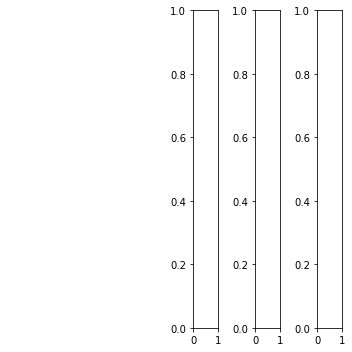

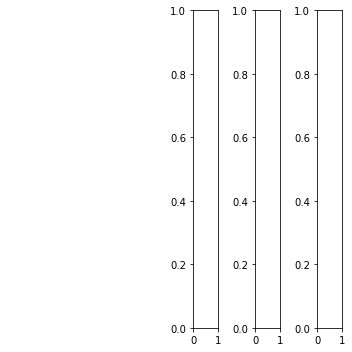

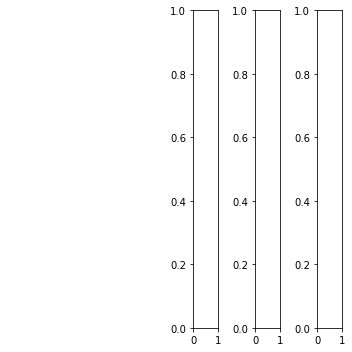

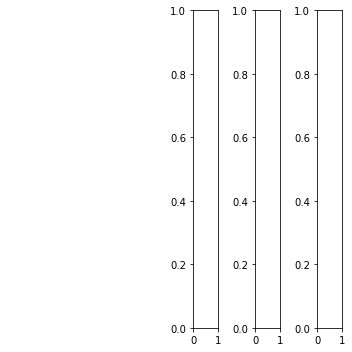

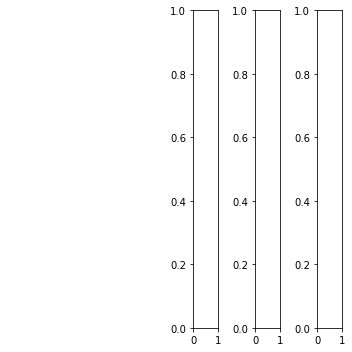

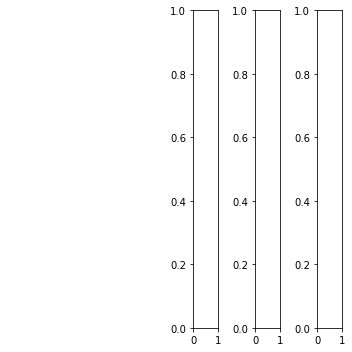

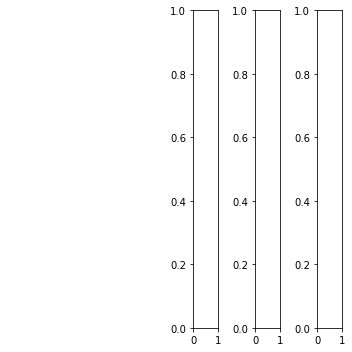

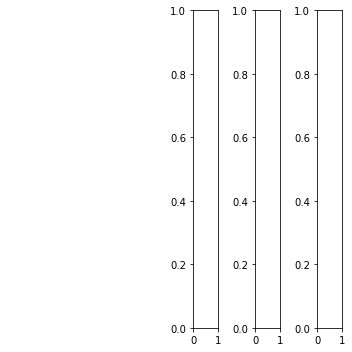

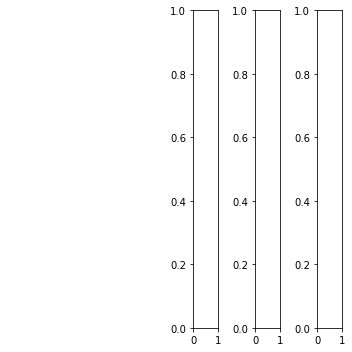

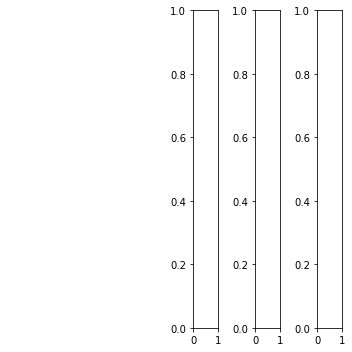

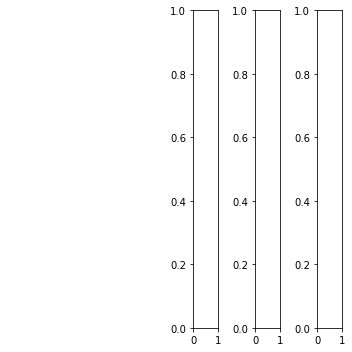

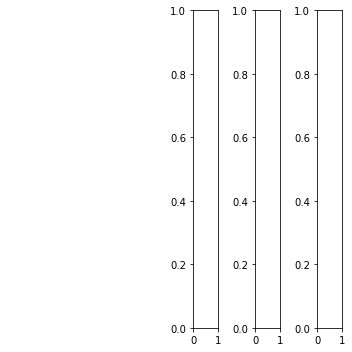

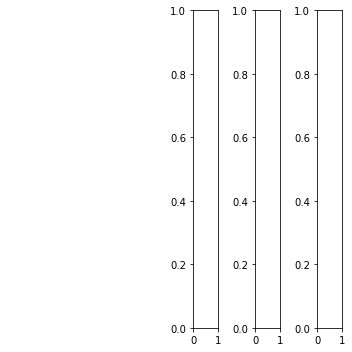

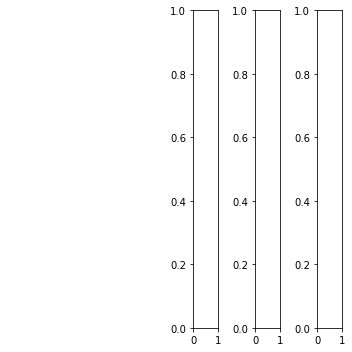

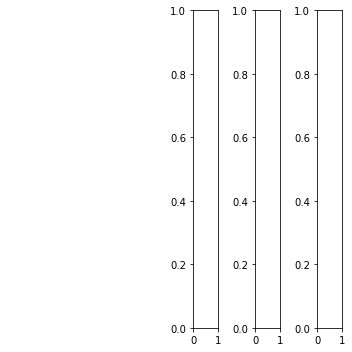

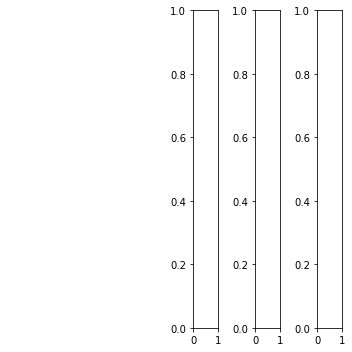

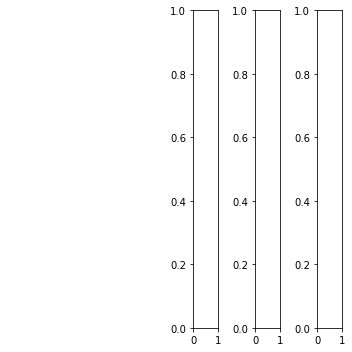

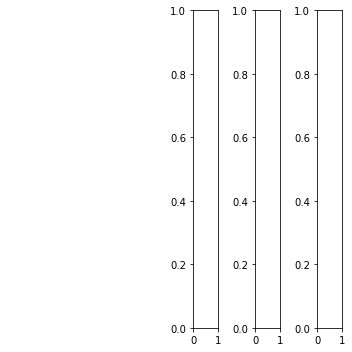

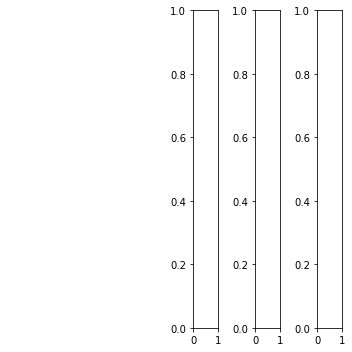

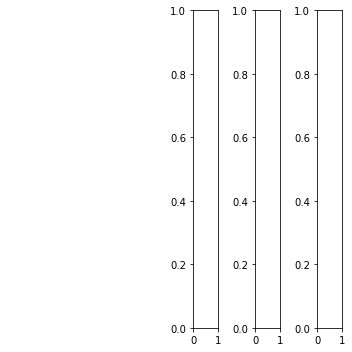

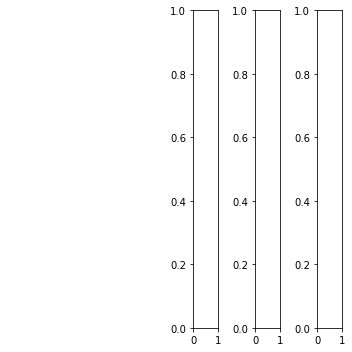

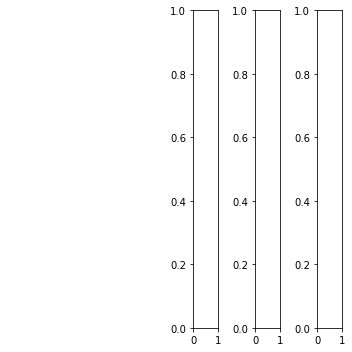

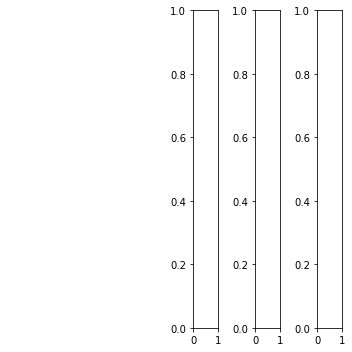

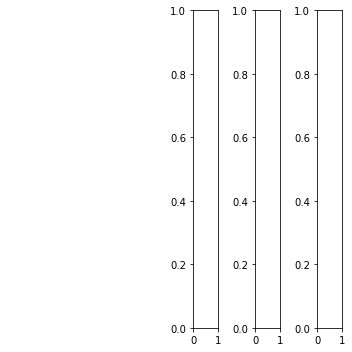

In [11]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)

### Question 4

Using the same architecture, add in batch normalization between each of the hidden layers. Compare the training loss with and without batch normalization as a function of epochs. What is the final test error? Visualize the filters.

In [12]:
def define_model():
	model = Sequential([
	Conv2D(64, (11, 11), activation='relu', padding='same', input_shape=(32, 32, 3)),
	BatchNormalization(),
  MaxPooling2D((2, 2)),
	Conv2D(128, (3, 3), activation='relu', padding='same'),
	BatchNormalization(),
	Conv2D(128, (3, 3), activation='relu', padding='same'),
	BatchNormalization(),
	Flatten(),
	Dense(10, activation='softmax')])
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [13]:
model = define_model()
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))


2022-06-15 23:38:04.506927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-15 23:38:36.267867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


> 68.480


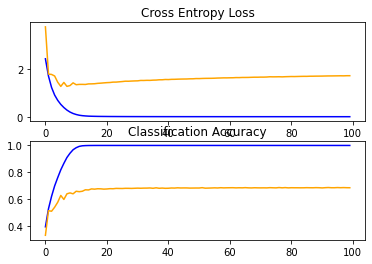

In [14]:
summarize_diagnostics(history)

The model with the batch normalization had a better result when looking at the graphs for the test data as there is less of an issue of overfitting to the training data.

## Problem 3

### Question 1

Train a basic GAN that can generate images from the Fashion-MNIST dataset. Plot your training loss curves for your G and D. Show the generated samples from G in 1) the beginning of the training; 2) intermediate stage of the training, and 3) after convergence.

In [15]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

## Load and prepare the data set

In [16]:
(train_images, train_labesl), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 17s 4us/step


In [17]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [18]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [19]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Creat the models

### The Generator

In [20]:
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Reshape((7,7,256)))
  assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

  model.add(layers.Conv2DTranspose(128, (5, 5), strides = (1, 1), padding = 'same', use_bias=False))
  assert model.output_shape == (None, 7, 7, 128)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(64, (5, 5), strides = (2, 2), padding = 'same', use_bias=False))
  assert model.output_shape == (None, 14, 14, 64)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(1, (5, 5), strides = (2, 2), padding = 'same', use_bias=False, activation = 'tanh'))
  assert model.output_shape == (None, 28, 28, 1)

  return model

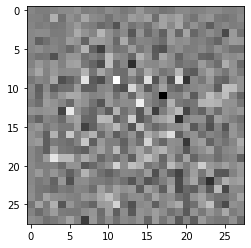

In [21]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### The Discriminator

In [22]:
def make_discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64, (5, 5), strides= (2, 2), padding= 'same', input_shape = [28, 28, 1]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128, (5, 5), strides= (2, 2), padding= 'same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1, activation='sigmoid'))

  return model

In [23]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.50103533]], shape=(1, 1), dtype=float32)


## Define the loss and optimizers

In [24]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### Discriminator loss

In [25]:
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

### Generator loss

In [26]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are differen since we will train two networks separately

In [27]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save Checkpoints

In [28]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                                 discriminator_optimizer = discriminator_optimizer,
                                 generator = generator,
                                 discriminator = discriminator)

### Define the training loop

In [29]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [30]:
# Notice the use of  `tf.function`
# this annotation causes the function to be "compiled"
@tf.function
def train_step(images):
  noise = tf.random.normal([BATCH_SIZE, noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training = True)

    real_output = discriminator(images, training = True)
    fake_output = discriminator(generated_images, training = True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [31]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      gen_loss, disc_loss = train_step(image_batch)
    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch +1,
                             seed)
    
    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)
    
    print("Time for epoch {} is {} sec".format(epoch +1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)


generate and save images

In [32]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training is set to fale.
  # This is so all layers run in inference mode (batchnorm)
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0] *127.5 +127.5, cmap='gray')
    plt.axis('off')

  plt.savefig('image_at_epoch{:04d}.png'.format(epoch))
  plt.show()

### Train the model

In [34]:
g_loss, d_loss = train(train_dataset, EPOCHS)

TypeError: cannot unpack non-iterable NoneType object

## Create a GIF

In [35]:
# Dispolay a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch{:04d}.png'.format(epoch_no))

In [36]:
display_image(EPOCHS)

FileNotFoundError: [Errno 2] No such file or directory: 'image_at_epoch0050.png'

Use imageio to create an animated gif using the images saved during training.

In [37]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

  import IPython
  if IPython.version_info > (6,2,0,''):
    display.Image(filename=anim_file)

NameError: name 'filename' is not defined

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(anim_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Question 2

Train an unrolled GAN and plot the histogram from 3000 generated samples. Discuss whether unrolled GAN seems to help reduce the mode collapse problem.

In [ ]:
_graph_replace = tf.contrib.graph_editor.graph_replace
for i in range( - 1):
    cur_update_dict = graph_replace(update_dict, cur_update_dict)
    unrolled_loss = graph_replace(loss, cur_update_dict)

AttributeError: ignored